In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()

DNot ='posNewTouchedData/-1,-1.csv'
D0_0 = 'posNewTouchedData/0,0.csv'
D0_3 = 'posNewTouchedData/0,3.csv'
D0_6 = 'posNewTouchedData/0,6.csv'
D0_7_5 = 'posNewTouchedData/0,7.5.csv'
D0_9 = 'posNewTouchedData/0,9.csv'
D0_12 = 'posNewTouchedData/0,12.csv'
D0_15 ='posNewTouchedData/0,15.csv'
D3_0 ='posNewTouchedData/3,0.csv'
D3_3 ='posNewTouchedData/3,3.csv'
D3_6 ='posNewTouchedData/3,6.csv'
D3_9 ='posNewTouchedData/3,9.csv'
D3_12 ='posNewTouchedData/3,12.csv'
D3_15 ='posNewTouchedData/3,15.csv'
D6_0 ='posNewTouchedData/6,0.csv'
D6_3 ='posNewTouchedData/6,3.csv'
D6_6 ='posNewTouchedData/6,6.csv'
D6_9 ='posNewTouchedData/6,9.csv'
D6_12 ='posNewTouchedData/6,12.csv'
D6_15 ='posNewTouchedData/6,15.csv'
D7_5_0 ='posNewTouchedData/7.5,0.csv'
D7_5_7_5 ='posNewTouchedData/7.5,7.5.csv'
D7_5_15 ='posNewTouchedData/7.5,15.csv'
D9_0 ='posNewTouchedData/9,0.csv'
D9_3 ='posNewTouchedData/9,3.csv'
D9_6 ='posNewTouchedData/9,6.csv'
D9_9 ='posNewTouchedData/9,9.csv'
D9_12 ='posNewTouchedData/9,12.csv'
D9_15 ='posNewTouchedData/9,15.csv'
D12_0 ='posNewTouchedData/12,0.csv'
D12_3 ='posNewTouchedData/12,3.csv'
D12_6 ='posNewTouchedData/12,6.csv'
D12_9 ='posNewTouchedData/12,9.csv'
D12_12 ='posNewTouchedData/12,12.csv'
D12_15 ='posNewTouchedData/12,15.csv'
D15_0 ='posNewTouchedData/15,0.csv'
D15_3 ='posNewTouchedData/15,3.csv'
D15_6 ='posNewTouchedData/15,6.csv'
D15_7_5 = 'posNewTouchedData/15,7.5.csv'
D15_9 ='posNewTouchedData/15,9.csv'
D15_12 ='posNewTouchedData/15,12.csv'
D15_15 = 'posNewTouchedData/15,15.csv'

#--------------------------
D_0_0='posNewTouchData2/0,0.csv'
D_0_7_5='posNewTouchData2/0,7.5.csv'
D_0_18='posNewTouchData2/0,18.csv'
D_Not='posNewTouchData2/-1,-1.csv'
D_3_3='posNewTouchData2/3,3.csv'
D_3_12='posNewTouchData2/3,12.csv'
D_7_5_0='posNewTouchData2/7.5,0.csv'
D_7_5_7_5='posNewTouchData2/7.5,7.5.csv'
D_7_5_15='posNewTouchData2/7.5,15.csv'
D_12_3='posNewTouchData2/12,3.csv'
D_12_12='posNewTouchData2/12,12.csv'
D_15_0='posNewTouchData2/15,0.csv'
D_15_7_5='posNewTouchData2/15,7.5.csv'
D_15_15='posNewTouchData2/15,15.csv'


# 51 datasets

#df1 = pd.read_csv(url)

# Importing the Boston Housing dataset
#from sklearn.datasets import load_boston

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.debugging.set_log_device_placement(True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
        
"""print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if not tf.test.gpu_device_name():
    print("not found")
else:
    print("device: {}".format(tf.test.gpu_device_name()))
    
tf.debugging.set_log_device_placement(True)"""
    

'print("Num GPUs Available: ", len(tf.config.list_physical_devices(\'GPU\')))\n\nif not tf.test.gpu_device_name():\n    print("not found")\nelse:\n    print("device: {}".format(tf.test.gpu_device_name()))\n    \ntf.debugging.set_log_device_placement(True)'

In [3]:
def ChangetoMean(x, numD):
    NumDiv = numD
    d0_7_5Mean = np.empty((int(x.shape[0]/NumDiv),x.shape[1]))
    for i in range(int(x.shape[0]/NumDiv)):
        d0_7_5Mean[i,:] = np.mean(x.iloc[i*NumDiv:i*NumDiv+NumDiv,:],axis=0)
    return d0_7_5Mean

In [4]:
def ratioSxSy(x):
    Sxnum=-(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])-(1/x[x.columns[3]])    
    Synum=-(1/x[x.columns[0]])-(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    Sden=(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    x['Sx'] = Sxnum/Sden
    x['Sy'] = Synum/Sden
    return x

In [5]:
def changeLast(x,num):
    #x.pop(x.columns[5])
    x[x.columns[5]]=num
    return x

In [30]:
d0_0 = pd.read_csv(D0_0,header=None)
ratioSxSy(d0_0)
d0_0

,0,1,2,3,4,5,Sx,Sy
0,264.8,13.0,296.2,511.6,0,0,0.866766,-0.876073
1,265.0,13.0,296.4,512.2,0,0,0.866874,-0.876168
2,264.8,13.0,296.4,516.4,0,0,0.867157,-0.876519
3,264.8,13.0,297.0,520.8,0,0,0.867501,-0.877024
4,265.4,13.0,297.0,518.6,0,0,0.867510,-0.876834
...,...,...,...,...,...,...,...,...
4995,246.8,18.0,340.8,903.2,0,0,0.837891,-0.873008
4996,248.0,18.0,342.8,904.0,0,0,0.838442,-0.873502
4997,250.0,18.0,342.4,904.8,0,0,0.839411,-0.873366
4998,248.4,18.0,343.0,905.6,0,0,0.838682,-0.873597


In [30]:
changeLast(d0_0,5)

,0,1,2,3,4,5
0,264.8,13.0,296.2,511.6,0,5
1,265.0,13.0,296.4,512.2,0,5
2,264.8,13.0,296.4,516.4,0,5
3,264.8,13.0,297.0,520.8,0,5
4,265.4,13.0,297.0,518.6,0,5
...,...,...,...,...,...,...
4995,246.8,18.0,340.8,903.2,0,5
4996,248.0,18.0,342.8,904.0,0,5
4997,250.0,18.0,342.4,904.8,0,5
4998,248.4,18.0,343.0,905.6,0,5


In [6]:
dNot = ratioSxSy(pd.read_csv(DNot,header=None))
d0_0 = ratioSxSy(pd.read_csv(D0_0,header=None))
d0_3 = ratioSxSy(pd.read_csv(D0_3,header=None))
d0_6 = ratioSxSy(pd.read_csv(D0_6,header=None))
d0_7_5 = ChangetoMean(ratioSxSy(pd.read_csv(D0_7_5,header=None)), 5)
d0_9 = ratioSxSy(pd.read_csv(D0_9,header=None))
d0_12 = ratioSxSy(pd.read_csv(D0_12,header=None))
d0_15 = ratioSxSy(pd.read_csv(D0_15,header=None))
d3_0 = ratioSxSy(pd.read_csv(D3_0,header=None))
d3_3 = ratioSxSy(pd.read_csv(D3_3,header=None))
d3_6 =ratioSxSy(pd.read_csv(D3_6,header=None))
d3_9 = ratioSxSy(pd.read_csv(D3_9,header=None))
d3_12 = ratioSxSy(pd.read_csv(D3_12,header=None))
d3_15 = ratioSxSy(pd.read_csv(D3_15,header=None))
d6_0 = ratioSxSy(pd.read_csv(D6_0,header=None))
d6_3 = ratioSxSy(pd.read_csv(D6_3,header=None))
d6_6 = ratioSxSy(pd.read_csv(D6_6,header=None))
d6_9 = ratioSxSy(pd.read_csv(D6_9,header=None))
d6_12 = ratioSxSy(pd.read_csv(D6_12,header=None))
d6_15 = ratioSxSy(pd.read_csv(D6_15,header=None))
d7_5_0 = ratioSxSy(pd.read_csv(D7_5_0,header=None))
d7_5_7_5 = ratioSxSy(pd.read_csv(D7_5_7_5,header=None))
d7_5_15 = ratioSxSy(pd.read_csv(D7_5_15,header=None))
d9_0 = ratioSxSy(pd.read_csv(D9_0,header=None))
d9_3 = ratioSxSy(pd.read_csv(D9_0,header=None))
d9_6 = ratioSxSy(pd.read_csv(D9_6,header=None))
d9_9 = ratioSxSy(pd.read_csv(D9_9,header=None))
d9_12 = ratioSxSy(pd.read_csv(D9_12,header=None))
d9_15 = ratioSxSy(pd.read_csv(D9_15,header=None))
d12_0 = ratioSxSy(pd.read_csv(D12_0,header=None))
d12_3 = ratioSxSy(pd.read_csv(D12_3,header=None))
d12_6 = ratioSxSy(pd.read_csv(D12_6,header=None))
d12_9 = ratioSxSy(pd.read_csv(D12_9,header=None))
d12_12 = ratioSxSy(pd.read_csv(D12_12,header=None))
d12_15 = ratioSxSy(pd.read_csv(D12_15,header=None))
d15_0 = ratioSxSy(pd.read_csv(D15_0,header=None))
d15_3 = ratioSxSy(pd.read_csv(D15_3,header=None))
d15_6 = ratioSxSy(pd.read_csv(D15_6,header=None))
d15_7_5 = ratioSxSy(pd.read_csv(D15_7_5,header=None))
d15_9 = ratioSxSy(pd.read_csv(D15_9,header=None))
d15_12 = ratioSxSy(pd.read_csv(D15_12,header=None))
d15_15 = ratioSxSy(pd.read_csv(D15_15,header=None)) #42

#--------------------------
d_0_0 = ratioSxSy(pd.read_csv(D_0_0,header=None))
d_0_7_5 = ratioSxSy(pd.read_csv(D_0_7_5,header=None))
d_0_15 = ratioSxSy(changeLast(pd.read_csv(D_0_18,header=None),15))
d_Not = ratioSxSy(pd.read_csv(D_Not,header=None))
d_3_3 = ratioSxSy(pd.read_csv(D_3_3,header=None))
d_3_12 = ratioSxSy(pd.read_csv(D_3_12,header=None))
d_7_5_0 = ratioSxSy(pd.read_csv(D_7_5_0,header=None))
d_7_5_7_5 = ratioSxSy(pd.read_csv(D_7_5_7_5,header=None))
d_7_5_15 = ratioSxSy(pd.read_csv(D_7_5_15,header=None))
d_12_3 = ratioSxSy(pd.read_csv(D_12_3,header=None))
d_12_12 = ratioSxSy(pd.read_csv(D_12_12,header=None))
d_15_0 = ratioSxSy(pd.read_csv(D_15_0,header=None))
d_15_7_5 = ratioSxSy(pd.read_csv(D_15_7_5,header=None))
d_15_15 = ratioSxSy(pd.read_csv(D_15_15,header=None)) #14

In [32]:
d15_15.shape

(5000, 6)

In [7]:
datasRaw = np.concatenate([d0_0, d0_3, d0_6, d0_7_5, d0_9, d0_12, d0_15, d3_0, d3_3, d3_6, d3_9, d3_12, d3_15, d6_0, d6_3, 
                           d6_6, d6_9, d6_12, d6_15, d7_5_0, d7_5_7_5, d7_5_15, d9_0, d9_3, d9_6, d9_9, d9_12,
                           d9_15, d12_0, d12_3, d12_6, d12_9, d12_12, d12_15, d15_0, d15_3, d15_6, d15_7_5, d15_9, 
                           d15_12, d15_15, d_0_0, d_0_7_5, d_0_15, d_3_3, d_3_12, d_7_5_0, d_7_5_7_5, d_7_5_15, 
                           d_12_3, d_12_12, d_15_0, d_15_7_5, d_15_15])
datasRaw.shape  # 41*5000 = 205000; 13*2500 = 32500; T= 237500

(237500, 8)

In [8]:
datasFull=pd.DataFrame.from_dict(datasRaw)
datasFull.columns=["F0","F1","F2","F3","x","y","Sx","Sy"]
datasFull.head()

,F0,F1,F2,F3,x,y,Sx,Sy
0,264.8,13.0,296.2,511.6,0.0,0.0,0.866766,-0.876073
1,265.0,13.0,296.4,512.2,0.0,0.0,0.866874,-0.876168
2,264.8,13.0,296.4,516.4,0.0,0.0,0.867157,-0.876519
3,264.8,13.0,297.0,520.8,0.0,0.0,0.867501,-0.877024
4,265.4,13.0,297.0,518.6,0.0,0.0,0.867510,-0.876834


In [9]:
FullDescribe=datasFull.describe()
FullDescribe=FullDescribe.transpose()
MeandataFull=FullDescribe['mean']
StddataFull=FullDescribe['std']

In [10]:
print("Mean: {}\nStd: {}".format(MeandataFull,StddataFull))

Mean: F0    408.942958
F1    138.473131
F2    394.008856
F3    308.599539
x       7.500000
y       7.436842
Sx      0.548101
Sy     -0.518616
Name: mean, dtype: float64
Std: F0    106.510489
F1    204.268260
F2    128.503499
F3    149.708490
x       5.164159
y       5.236644
Sx      0.429971
Sy      0.476176
Name: std, dtype: float64


In [11]:
dataTrain, dataTest = train_test_split(datasFull, test_size=0.1)
dataTrain, dataVal = train_test_split(dataTrain, test_size=0.2)

In [12]:
dataTrain.head()

,F0,F1,F2,F3,x,y,Sx,Sy
183479,327.8,520.6,738.4,232.0,15.0,6.0,-0.384148,0.065167
45137,352.2,13.8,364.4,224.0,3.0,6.0,0.822968,-0.825272
174918,297.0,13.0,576.0,223.0,15.0,0.0,0.818489,-0.856193
56459,492.6,13.0,331.8,223.0,3.0,12.0,0.849294,-0.826534
11863,421.0,18.0,330.0,473.6,0.0,6.0,0.857726,-0.836957


In [13]:
# Helper functions
def normNew(x):
    return ((x - MeandataFull) / StddataFull)

def norm4(x, meanD, stdD):
    return ((x - meanD) / stdD)

def norm2(x):
    return ((x - train_stats['mean']) / train_stats['std'])

def norm3(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    return ((x - dataDescribe['mean']) / dataDescribe['std'])

def format_output(data):
    data2=data
    y1 = data2.pop('x')    
    y2 = data2.pop('y')
    return y1, y2

def format_input(data):
    data2=data
    data2.pop('x')    
    data2.pop('y')
    return data2 

def format_output2(data):
    y1 = data.pop('x')   
    y1=np.array(y1)
    y2 = data.pop('y')
    y2=np.array(y2)
    return y1, y2

def PrintMeanStd(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    print("Mean: {}\nStd: {}".format(dataDescribe['mean'],dataDescribe['std']))
    


In [14]:
# Normalize the training and test data
norm_train_X = format_input(normNew(dataTrain))
train_Y = format_output(dataTrain)

norm_test_X=format_input(normNew(dataTest))
test_Y=format_output(dataTest)

norm_val_X = format_input(normNew(dataVal))
val_Y = format_output(dataVal)

norm_train_X = np.array(norm_train_X)
#train_Y = np.array(train_Y)
norm_test_X = np.array(norm_test_X)
#test_Y = np.array(test_Y)
norm_val_X = np.array(norm_val_X)
#val_Y = np.array(val_Y)

In [50]:
norm_train_X

array([[-0.90641738,  1.48886013, -1.35411765, -0.56509513, -1.41304067,
         1.604244  ],
       [-0.66606546,  1.2489795 ,  0.9337578 , -0.53169689, -1.83379017,
         1.23369367],
       [ 0.40049616, -0.61425662,  0.00771298, -0.57177478,  0.68933498,
        -0.66889788],
       ...,
       [-0.37125882, -0.60446557, -0.35181031,  1.35864346,  0.75883404,
        -0.73807112],
       [-1.37209921, -0.60446557, -0.47787692,  1.99454594,  0.71342766,
        -0.75076762],
       [-0.29427109, -0.61915214,  0.11665943, -0.57845442,  0.69298048,
        -0.69684755]])

In [15]:
def build_model():
    # Define model layers.
    input_layer = layers.Input(shape=(len(norm_train_X[1]),))
    x = layers.Dense(130)(input_layer)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    x = layers.Dense(130)(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)  
    
    x = layers.Dense(130)(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    third_dense = layers.Dense(units='130', activation='relu')(x)
    #third_dense=layers.Dropout(0.5)(third_dense)
    
    # Y1 output will be fed from the first dense
    y1_output = layers.Dense(units='1', name='x_output')(third_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = layers.Dense(units='1', name='y_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [16]:
model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'x_output': 'mse', 'y_output': 'mse'},
              metrics={'x_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y_output': tf.keras.metrics.RootMeanSquaredError()})

In [18]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=3000,validation_data=(norm_test_X, test_Y),verbose=2)

Epoch 1/3000
5344/5344 - 9s - loss: 3.3714 - x_output_loss: 2.2102 - y_output_loss: 1.1612 - x_output_root_mean_squared_error: 1.4867 - y_output_root_mean_squared_error: 1.0776 - val_loss: 1.7591 - val_x_output_loss: 1.1780 - val_y_output_loss: 0.5811 - val_x_output_root_mean_squared_error: 1.0854 - val_y_output_root_mean_squared_error: 0.7623
Epoch 2/3000
5344/5344 - 9s - loss: 2.6361 - x_output_loss: 1.7526 - y_output_loss: 0.8835 - x_output_root_mean_squared_error: 1.3239 - y_output_root_mean_squared_error: 0.9400 - val_loss: 1.5296 - val_x_output_loss: 1.0244 - val_y_output_loss: 0.5052 - val_x_output_root_mean_squared_error: 1.0121 - val_y_output_root_mean_squared_error: 0.7108
Epoch 3/3000
5344/5344 - 9s - loss: 2.2629 - x_output_loss: 1.5117 - y_output_loss: 0.7512 - x_output_root_mean_squared_error: 1.2295 - y_output_root_mean_squared_error: 0.8667 - val_loss: 1.4376 - val_x_output_loss: 1.0232 - val_y_output_loss: 0.4144 - val_x_output_root_mean_squared_error: 1.0115 - val_y_o

Epoch 25/3000
5344/5344 - 9s - loss: 1.1917 - x_output_loss: 0.8203 - y_output_loss: 0.3714 - x_output_root_mean_squared_error: 0.9057 - y_output_root_mean_squared_error: 0.6094 - val_loss: 0.7580 - val_x_output_loss: 0.5479 - val_y_output_loss: 0.2101 - val_x_output_root_mean_squared_error: 0.7402 - val_y_output_root_mean_squared_error: 0.4584
Epoch 26/3000
5344/5344 - 11s - loss: 1.1835 - x_output_loss: 0.8196 - y_output_loss: 0.3640 - x_output_root_mean_squared_error: 0.9053 - y_output_root_mean_squared_error: 0.6033 - val_loss: 0.9209 - val_x_output_loss: 0.6693 - val_y_output_loss: 0.2516 - val_x_output_root_mean_squared_error: 0.8181 - val_y_output_root_mean_squared_error: 0.5016
Epoch 27/3000
5344/5344 - 11s - loss: 1.1722 - x_output_loss: 0.8140 - y_output_loss: 0.3582 - x_output_root_mean_squared_error: 0.9022 - y_output_root_mean_squared_error: 0.5985 - val_loss: 0.7570 - val_x_output_loss: 0.5514 - val_y_output_loss: 0.2056 - val_x_output_root_mean_squared_error: 0.7426 - va

Epoch 49/3000
5344/5344 - 8s - loss: 0.9718 - x_output_loss: 0.6843 - y_output_loss: 0.2874 - x_output_root_mean_squared_error: 0.8272 - y_output_root_mean_squared_error: 0.5361 - val_loss: 0.5977 - val_x_output_loss: 0.4288 - val_y_output_loss: 0.1690 - val_x_output_root_mean_squared_error: 0.6548 - val_y_output_root_mean_squared_error: 0.4111
Epoch 50/3000
5344/5344 - 8s - loss: 0.9590 - x_output_loss: 0.6729 - y_output_loss: 0.2862 - x_output_root_mean_squared_error: 0.8203 - y_output_root_mean_squared_error: 0.5349 - val_loss: 0.7109 - val_x_output_loss: 0.4966 - val_y_output_loss: 0.2143 - val_x_output_root_mean_squared_error: 0.7047 - val_y_output_root_mean_squared_error: 0.4629
Epoch 51/3000
5344/5344 - 8s - loss: 0.9601 - x_output_loss: 0.6742 - y_output_loss: 0.2858 - x_output_root_mean_squared_error: 0.8211 - y_output_root_mean_squared_error: 0.5346 - val_loss: 0.6701 - val_x_output_loss: 0.4792 - val_y_output_loss: 0.1909 - val_x_output_root_mean_squared_error: 0.6922 - val_

Epoch 73/3000
5344/5344 - 9s - loss: 0.8599 - x_output_loss: 0.6120 - y_output_loss: 0.2479 - x_output_root_mean_squared_error: 0.7823 - y_output_root_mean_squared_error: 0.4979 - val_loss: 0.5425 - val_x_output_loss: 0.3963 - val_y_output_loss: 0.1463 - val_x_output_root_mean_squared_error: 0.6295 - val_y_output_root_mean_squared_error: 0.3824
Epoch 74/3000
5344/5344 - 9s - loss: 0.8430 - x_output_loss: 0.5978 - y_output_loss: 0.2452 - x_output_root_mean_squared_error: 0.7732 - y_output_root_mean_squared_error: 0.4951 - val_loss: 0.5718 - val_x_output_loss: 0.4198 - val_y_output_loss: 0.1521 - val_x_output_root_mean_squared_error: 0.6479 - val_y_output_root_mean_squared_error: 0.3900
Epoch 75/3000
5344/5344 - 9s - loss: 0.8577 - x_output_loss: 0.6077 - y_output_loss: 0.2500 - x_output_root_mean_squared_error: 0.7795 - y_output_root_mean_squared_error: 0.5000 - val_loss: 0.5887 - val_x_output_loss: 0.4269 - val_y_output_loss: 0.1618 - val_x_output_root_mean_squared_error: 0.6534 - val_

Epoch 97/3000
5344/5344 - 9s - loss: 0.7912 - x_output_loss: 0.5666 - y_output_loss: 0.2246 - x_output_root_mean_squared_error: 0.7527 - y_output_root_mean_squared_error: 0.4739 - val_loss: 0.4997 - val_x_output_loss: 0.3705 - val_y_output_loss: 0.1292 - val_x_output_root_mean_squared_error: 0.6087 - val_y_output_root_mean_squared_error: 0.3595
Epoch 98/3000
5344/5344 - 9s - loss: 0.7962 - x_output_loss: 0.5703 - y_output_loss: 0.2259 - x_output_root_mean_squared_error: 0.7552 - y_output_root_mean_squared_error: 0.4753 - val_loss: 0.5395 - val_x_output_loss: 0.3997 - val_y_output_loss: 0.1398 - val_x_output_root_mean_squared_error: 0.6322 - val_y_output_root_mean_squared_error: 0.3739
Epoch 99/3000
5344/5344 - 9s - loss: 0.7939 - x_output_loss: 0.5689 - y_output_loss: 0.2250 - x_output_root_mean_squared_error: 0.7542 - y_output_root_mean_squared_error: 0.4744 - val_loss: 0.5570 - val_x_output_loss: 0.4044 - val_y_output_loss: 0.1526 - val_x_output_root_mean_squared_error: 0.6359 - val_

Epoch 121/3000
5344/5344 - 9s - loss: 0.7336 - x_output_loss: 0.5307 - y_output_loss: 0.2029 - x_output_root_mean_squared_error: 0.7285 - y_output_root_mean_squared_error: 0.4504 - val_loss: 0.5283 - val_x_output_loss: 0.3877 - val_y_output_loss: 0.1405 - val_x_output_root_mean_squared_error: 0.6227 - val_y_output_root_mean_squared_error: 0.3749
Epoch 122/3000
5344/5344 - 9s - loss: 0.7504 - x_output_loss: 0.5424 - y_output_loss: 0.2080 - x_output_root_mean_squared_error: 0.7365 - y_output_root_mean_squared_error: 0.4561 - val_loss: 0.4865 - val_x_output_loss: 0.3547 - val_y_output_loss: 0.1318 - val_x_output_root_mean_squared_error: 0.5956 - val_y_output_root_mean_squared_error: 0.3631
Epoch 123/3000
5344/5344 - 9s - loss: 0.7405 - x_output_loss: 0.5345 - y_output_loss: 0.2060 - x_output_root_mean_squared_error: 0.7311 - y_output_root_mean_squared_error: 0.4539 - val_loss: 0.4838 - val_x_output_loss: 0.3632 - val_y_output_loss: 0.1206 - val_x_output_root_mean_squared_error: 0.6026 - v

Epoch 145/3000
5344/5344 - 9s - loss: 0.7168 - x_output_loss: 0.5219 - y_output_loss: 0.1949 - x_output_root_mean_squared_error: 0.7225 - y_output_root_mean_squared_error: 0.4414 - val_loss: 0.5075 - val_x_output_loss: 0.3795 - val_y_output_loss: 0.1280 - val_x_output_root_mean_squared_error: 0.6160 - val_y_output_root_mean_squared_error: 0.3578
Epoch 146/3000
5344/5344 - 9s - loss: 0.7078 - x_output_loss: 0.5118 - y_output_loss: 0.1960 - x_output_root_mean_squared_error: 0.7154 - y_output_root_mean_squared_error: 0.4427 - val_loss: 0.5061 - val_x_output_loss: 0.3781 - val_y_output_loss: 0.1281 - val_x_output_root_mean_squared_error: 0.6149 - val_y_output_root_mean_squared_error: 0.3579
Epoch 147/3000
5344/5344 - 9s - loss: 0.7063 - x_output_loss: 0.5131 - y_output_loss: 0.1932 - x_output_root_mean_squared_error: 0.7163 - y_output_root_mean_squared_error: 0.4396 - val_loss: 0.4564 - val_x_output_loss: 0.3383 - val_y_output_loss: 0.1181 - val_x_output_root_mean_squared_error: 0.5816 - v

Epoch 169/3000
5344/5344 - 9s - loss: 0.6816 - x_output_loss: 0.4965 - y_output_loss: 0.1851 - x_output_root_mean_squared_error: 0.7046 - y_output_root_mean_squared_error: 0.4303 - val_loss: 0.4381 - val_x_output_loss: 0.3271 - val_y_output_loss: 0.1110 - val_x_output_root_mean_squared_error: 0.5719 - val_y_output_root_mean_squared_error: 0.3331
Epoch 170/3000
5344/5344 - 9s - loss: 0.6704 - x_output_loss: 0.4868 - y_output_loss: 0.1836 - x_output_root_mean_squared_error: 0.6977 - y_output_root_mean_squared_error: 0.4285 - val_loss: 0.5165 - val_x_output_loss: 0.3644 - val_y_output_loss: 0.1520 - val_x_output_root_mean_squared_error: 0.6037 - val_y_output_root_mean_squared_error: 0.3899
Epoch 171/3000
5344/5344 - 9s - loss: 0.6718 - x_output_loss: 0.4884 - y_output_loss: 0.1834 - x_output_root_mean_squared_error: 0.6989 - y_output_root_mean_squared_error: 0.4282 - val_loss: 0.4908 - val_x_output_loss: 0.3607 - val_y_output_loss: 0.1301 - val_x_output_root_mean_squared_error: 0.6006 - v

Epoch 193/3000
5344/5344 - 9s - loss: 0.6661 - x_output_loss: 0.4879 - y_output_loss: 0.1782 - x_output_root_mean_squared_error: 0.6985 - y_output_root_mean_squared_error: 0.4221 - val_loss: 0.4213 - val_x_output_loss: 0.3182 - val_y_output_loss: 0.1031 - val_x_output_root_mean_squared_error: 0.5641 - val_y_output_root_mean_squared_error: 0.3210
Epoch 194/3000
5344/5344 - 9s - loss: 0.6478 - x_output_loss: 0.4729 - y_output_loss: 0.1749 - x_output_root_mean_squared_error: 0.6877 - y_output_root_mean_squared_error: 0.4182 - val_loss: 0.5021 - val_x_output_loss: 0.3774 - val_y_output_loss: 0.1247 - val_x_output_root_mean_squared_error: 0.6144 - val_y_output_root_mean_squared_error: 0.3531
Epoch 195/3000
5344/5344 - 9s - loss: 0.6559 - x_output_loss: 0.4790 - y_output_loss: 0.1768 - x_output_root_mean_squared_error: 0.6921 - y_output_root_mean_squared_error: 0.4205 - val_loss: 0.4156 - val_x_output_loss: 0.3116 - val_y_output_loss: 0.1039 - val_x_output_root_mean_squared_error: 0.5582 - v

Epoch 217/3000
5344/5344 - 9s - loss: 0.6342 - x_output_loss: 0.4635 - y_output_loss: 0.1707 - x_output_root_mean_squared_error: 0.6808 - y_output_root_mean_squared_error: 0.4132 - val_loss: 0.5000 - val_x_output_loss: 0.3708 - val_y_output_loss: 0.1292 - val_x_output_root_mean_squared_error: 0.6089 - val_y_output_root_mean_squared_error: 0.3594
Epoch 218/3000
5344/5344 - 9s - loss: 0.6345 - x_output_loss: 0.4650 - y_output_loss: 0.1695 - x_output_root_mean_squared_error: 0.6819 - y_output_root_mean_squared_error: 0.4117 - val_loss: 0.5508 - val_x_output_loss: 0.4218 - val_y_output_loss: 0.1290 - val_x_output_root_mean_squared_error: 0.6495 - val_y_output_root_mean_squared_error: 0.3592
Epoch 219/3000
5344/5344 - 9s - loss: 0.6346 - x_output_loss: 0.4625 - y_output_loss: 0.1720 - x_output_root_mean_squared_error: 0.6801 - y_output_root_mean_squared_error: 0.4148 - val_loss: 0.4542 - val_x_output_loss: 0.3364 - val_y_output_loss: 0.1179 - val_x_output_root_mean_squared_error: 0.5800 - v

Epoch 241/3000
5344/5344 - 9s - loss: 0.6185 - x_output_loss: 0.4548 - y_output_loss: 0.1637 - x_output_root_mean_squared_error: 0.6744 - y_output_root_mean_squared_error: 0.4046 - val_loss: 0.4318 - val_x_output_loss: 0.3236 - val_y_output_loss: 0.1082 - val_x_output_root_mean_squared_error: 0.5689 - val_y_output_root_mean_squared_error: 0.3289
Epoch 242/3000
5344/5344 - 9s - loss: 0.6072 - x_output_loss: 0.4446 - y_output_loss: 0.1626 - x_output_root_mean_squared_error: 0.6668 - y_output_root_mean_squared_error: 0.4032 - val_loss: 0.4054 - val_x_output_loss: 0.2994 - val_y_output_loss: 0.1060 - val_x_output_root_mean_squared_error: 0.5472 - val_y_output_root_mean_squared_error: 0.3256
Epoch 243/3000
5344/5344 - 9s - loss: 0.6104 - x_output_loss: 0.4494 - y_output_loss: 0.1610 - x_output_root_mean_squared_error: 0.6704 - y_output_root_mean_squared_error: 0.4012 - val_loss: 0.4087 - val_x_output_loss: 0.2980 - val_y_output_loss: 0.1107 - val_x_output_root_mean_squared_error: 0.5459 - v

Epoch 265/3000
5344/5344 - 9s - loss: 0.6099 - x_output_loss: 0.4462 - y_output_loss: 0.1638 - x_output_root_mean_squared_error: 0.6679 - y_output_root_mean_squared_error: 0.4047 - val_loss: 0.4103 - val_x_output_loss: 0.3107 - val_y_output_loss: 0.0996 - val_x_output_root_mean_squared_error: 0.5574 - val_y_output_root_mean_squared_error: 0.3155
Epoch 266/3000
5344/5344 - 9s - loss: 0.6052 - x_output_loss: 0.4454 - y_output_loss: 0.1597 - x_output_root_mean_squared_error: 0.6674 - y_output_root_mean_squared_error: 0.3997 - val_loss: 0.3851 - val_x_output_loss: 0.2875 - val_y_output_loss: 0.0976 - val_x_output_root_mean_squared_error: 0.5361 - val_y_output_root_mean_squared_error: 0.3124
Epoch 267/3000
5344/5344 - 9s - loss: 0.6027 - x_output_loss: 0.4417 - y_output_loss: 0.1610 - x_output_root_mean_squared_error: 0.6646 - y_output_root_mean_squared_error: 0.4012 - val_loss: 0.4064 - val_x_output_loss: 0.3053 - val_y_output_loss: 0.1011 - val_x_output_root_mean_squared_error: 0.5525 - v

Epoch 289/3000
5344/5344 - 9s - loss: 0.5863 - x_output_loss: 0.4331 - y_output_loss: 0.1532 - x_output_root_mean_squared_error: 0.6581 - y_output_root_mean_squared_error: 0.3914 - val_loss: 0.3864 - val_x_output_loss: 0.2895 - val_y_output_loss: 0.0969 - val_x_output_root_mean_squared_error: 0.5380 - val_y_output_root_mean_squared_error: 0.3113
Epoch 290/3000
5344/5344 - 9s - loss: 0.5827 - x_output_loss: 0.4309 - y_output_loss: 0.1518 - x_output_root_mean_squared_error: 0.6565 - y_output_root_mean_squared_error: 0.3896 - val_loss: 0.4150 - val_x_output_loss: 0.3037 - val_y_output_loss: 0.1112 - val_x_output_root_mean_squared_error: 0.5511 - val_y_output_root_mean_squared_error: 0.3335
Epoch 291/3000
5344/5344 - 9s - loss: 0.5855 - x_output_loss: 0.4306 - y_output_loss: 0.1549 - x_output_root_mean_squared_error: 0.6562 - y_output_root_mean_squared_error: 0.3936 - val_loss: 0.3855 - val_x_output_loss: 0.2881 - val_y_output_loss: 0.0974 - val_x_output_root_mean_squared_error: 0.5368 - v

Epoch 313/3000
5344/5344 - 9s - loss: 0.5694 - x_output_loss: 0.4199 - y_output_loss: 0.1495 - x_output_root_mean_squared_error: 0.6480 - y_output_root_mean_squared_error: 0.3866 - val_loss: 0.4521 - val_x_output_loss: 0.3314 - val_y_output_loss: 0.1208 - val_x_output_root_mean_squared_error: 0.5756 - val_y_output_root_mean_squared_error: 0.3475
Epoch 314/3000
5344/5344 - 9s - loss: 0.5685 - x_output_loss: 0.4205 - y_output_loss: 0.1481 - x_output_root_mean_squared_error: 0.6484 - y_output_root_mean_squared_error: 0.3848 - val_loss: 0.4333 - val_x_output_loss: 0.3344 - val_y_output_loss: 0.0989 - val_x_output_root_mean_squared_error: 0.5783 - val_y_output_root_mean_squared_error: 0.3144
Epoch 315/3000
5344/5344 - 9s - loss: 0.5705 - x_output_loss: 0.4203 - y_output_loss: 0.1503 - x_output_root_mean_squared_error: 0.6483 - y_output_root_mean_squared_error: 0.3877 - val_loss: 0.4495 - val_x_output_loss: 0.3361 - val_y_output_loss: 0.1134 - val_x_output_root_mean_squared_error: 0.5797 - v

Epoch 337/3000
5344/5344 - 9s - loss: 0.5622 - x_output_loss: 0.4144 - y_output_loss: 0.1478 - x_output_root_mean_squared_error: 0.6438 - y_output_root_mean_squared_error: 0.3844 - val_loss: 0.4214 - val_x_output_loss: 0.3160 - val_y_output_loss: 0.1054 - val_x_output_root_mean_squared_error: 0.5621 - val_y_output_root_mean_squared_error: 0.3247
Epoch 338/3000
5344/5344 - 9s - loss: 0.5571 - x_output_loss: 0.4132 - y_output_loss: 0.1440 - x_output_root_mean_squared_error: 0.6428 - y_output_root_mean_squared_error: 0.3794 - val_loss: 0.3794 - val_x_output_loss: 0.2853 - val_y_output_loss: 0.0940 - val_x_output_root_mean_squared_error: 0.5342 - val_y_output_root_mean_squared_error: 0.3067
Epoch 339/3000
5344/5344 - 9s - loss: 0.5811 - x_output_loss: 0.4286 - y_output_loss: 0.1525 - x_output_root_mean_squared_error: 0.6547 - y_output_root_mean_squared_error: 0.3905 - val_loss: 0.3593 - val_x_output_loss: 0.2720 - val_y_output_loss: 0.0873 - val_x_output_root_mean_squared_error: 0.5216 - v

Epoch 361/3000
5344/5344 - 9s - loss: 0.5542 - x_output_loss: 0.4095 - y_output_loss: 0.1447 - x_output_root_mean_squared_error: 0.6399 - y_output_root_mean_squared_error: 0.3804 - val_loss: 0.3455 - val_x_output_loss: 0.2581 - val_y_output_loss: 0.0874 - val_x_output_root_mean_squared_error: 0.5081 - val_y_output_root_mean_squared_error: 0.2956
Epoch 362/3000
5344/5344 - 9s - loss: 0.5502 - x_output_loss: 0.4079 - y_output_loss: 0.1423 - x_output_root_mean_squared_error: 0.6387 - y_output_root_mean_squared_error: 0.3773 - val_loss: 0.4182 - val_x_output_loss: 0.3117 - val_y_output_loss: 0.1064 - val_x_output_root_mean_squared_error: 0.5583 - val_y_output_root_mean_squared_error: 0.3262
Epoch 363/3000
5344/5344 - 9s - loss: 0.5559 - x_output_loss: 0.4118 - y_output_loss: 0.1440 - x_output_root_mean_squared_error: 0.6417 - y_output_root_mean_squared_error: 0.3795 - val_loss: 0.5729 - val_x_output_loss: 0.4078 - val_y_output_loss: 0.1651 - val_x_output_root_mean_squared_error: 0.6386 - v

Epoch 385/3000
5344/5344 - 9s - loss: 0.5348 - x_output_loss: 0.3946 - y_output_loss: 0.1402 - x_output_root_mean_squared_error: 0.6282 - y_output_root_mean_squared_error: 0.3745 - val_loss: 0.3916 - val_x_output_loss: 0.2894 - val_y_output_loss: 0.1022 - val_x_output_root_mean_squared_error: 0.5380 - val_y_output_root_mean_squared_error: 0.3196
Epoch 386/3000
5344/5344 - 9s - loss: 0.5447 - x_output_loss: 0.4022 - y_output_loss: 0.1426 - x_output_root_mean_squared_error: 0.6342 - y_output_root_mean_squared_error: 0.3776 - val_loss: 0.3557 - val_x_output_loss: 0.2681 - val_y_output_loss: 0.0876 - val_x_output_root_mean_squared_error: 0.5177 - val_y_output_root_mean_squared_error: 0.2960
Epoch 387/3000
5344/5344 - 9s - loss: 0.5407 - x_output_loss: 0.3993 - y_output_loss: 0.1414 - x_output_root_mean_squared_error: 0.6319 - y_output_root_mean_squared_error: 0.3761 - val_loss: 0.3841 - val_x_output_loss: 0.2896 - val_y_output_loss: 0.0945 - val_x_output_root_mean_squared_error: 0.5381 - v

Epoch 409/3000
5344/5344 - 9s - loss: 0.5357 - x_output_loss: 0.3985 - y_output_loss: 0.1372 - x_output_root_mean_squared_error: 0.6312 - y_output_root_mean_squared_error: 0.3705 - val_loss: 0.4406 - val_x_output_loss: 0.3207 - val_y_output_loss: 0.1199 - val_x_output_root_mean_squared_error: 0.5663 - val_y_output_root_mean_squared_error: 0.3463
Epoch 410/3000
5344/5344 - 9s - loss: 0.5405 - x_output_loss: 0.3993 - y_output_loss: 0.1412 - x_output_root_mean_squared_error: 0.6319 - y_output_root_mean_squared_error: 0.3758 - val_loss: 0.4293 - val_x_output_loss: 0.3150 - val_y_output_loss: 0.1144 - val_x_output_root_mean_squared_error: 0.5612 - val_y_output_root_mean_squared_error: 0.3382
Epoch 411/3000
5344/5344 - 9s - loss: 0.5231 - x_output_loss: 0.3873 - y_output_loss: 0.1358 - x_output_root_mean_squared_error: 0.6223 - y_output_root_mean_squared_error: 0.3685 - val_loss: 0.3965 - val_x_output_loss: 0.2987 - val_y_output_loss: 0.0978 - val_x_output_root_mean_squared_error: 0.5465 - v

Epoch 433/3000
5344/5344 - 9s - loss: 0.5318 - x_output_loss: 0.3948 - y_output_loss: 0.1370 - x_output_root_mean_squared_error: 0.6283 - y_output_root_mean_squared_error: 0.3701 - val_loss: 0.3403 - val_x_output_loss: 0.2575 - val_y_output_loss: 0.0827 - val_x_output_root_mean_squared_error: 0.5075 - val_y_output_root_mean_squared_error: 0.2876
Epoch 434/3000
5344/5344 - 9s - loss: 0.5231 - x_output_loss: 0.3872 - y_output_loss: 0.1360 - x_output_root_mean_squared_error: 0.6222 - y_output_root_mean_squared_error: 0.3688 - val_loss: 0.4747 - val_x_output_loss: 0.3510 - val_y_output_loss: 0.1237 - val_x_output_root_mean_squared_error: 0.5925 - val_y_output_root_mean_squared_error: 0.3517
Epoch 435/3000
5344/5344 - 9s - loss: 0.5199 - x_output_loss: 0.3853 - y_output_loss: 0.1346 - x_output_root_mean_squared_error: 0.6207 - y_output_root_mean_squared_error: 0.3669 - val_loss: 0.3632 - val_x_output_loss: 0.2692 - val_y_output_loss: 0.0940 - val_x_output_root_mean_squared_error: 0.5188 - v

Epoch 457/3000
5344/5344 - 9s - loss: 0.5201 - x_output_loss: 0.3848 - y_output_loss: 0.1353 - x_output_root_mean_squared_error: 0.6203 - y_output_root_mean_squared_error: 0.3678 - val_loss: 0.3612 - val_x_output_loss: 0.2743 - val_y_output_loss: 0.0869 - val_x_output_root_mean_squared_error: 0.5237 - val_y_output_root_mean_squared_error: 0.2948
Epoch 458/3000
5344/5344 - 9s - loss: 0.5281 - x_output_loss: 0.3930 - y_output_loss: 0.1351 - x_output_root_mean_squared_error: 0.6269 - y_output_root_mean_squared_error: 0.3676 - val_loss: 0.3609 - val_x_output_loss: 0.2644 - val_y_output_loss: 0.0965 - val_x_output_root_mean_squared_error: 0.5142 - val_y_output_root_mean_squared_error: 0.3107
Epoch 459/3000
5344/5344 - 9s - loss: 0.5187 - x_output_loss: 0.3862 - y_output_loss: 0.1326 - x_output_root_mean_squared_error: 0.6214 - y_output_root_mean_squared_error: 0.3641 - val_loss: 0.5079 - val_x_output_loss: 0.3552 - val_y_output_loss: 0.1527 - val_x_output_root_mean_squared_error: 0.5960 - v

Epoch 481/3000
5344/5344 - 8s - loss: 0.5188 - x_output_loss: 0.3848 - y_output_loss: 0.1339 - x_output_root_mean_squared_error: 0.6203 - y_output_root_mean_squared_error: 0.3660 - val_loss: 0.4059 - val_x_output_loss: 0.3086 - val_y_output_loss: 0.0973 - val_x_output_root_mean_squared_error: 0.5555 - val_y_output_root_mean_squared_error: 0.3119
Epoch 482/3000
5344/5344 - 9s - loss: 0.5039 - x_output_loss: 0.3750 - y_output_loss: 0.1288 - x_output_root_mean_squared_error: 0.6124 - y_output_root_mean_squared_error: 0.3589 - val_loss: 0.4391 - val_x_output_loss: 0.3324 - val_y_output_loss: 0.1068 - val_x_output_root_mean_squared_error: 0.5765 - val_y_output_root_mean_squared_error: 0.3268
Epoch 483/3000
5344/5344 - 8s - loss: 0.5178 - x_output_loss: 0.3852 - y_output_loss: 0.1326 - x_output_root_mean_squared_error: 0.6207 - y_output_root_mean_squared_error: 0.3641 - val_loss: 0.3605 - val_x_output_loss: 0.2675 - val_y_output_loss: 0.0930 - val_x_output_root_mean_squared_error: 0.5172 - v

Epoch 505/3000
5344/5344 - 9s - loss: 0.5036 - x_output_loss: 0.3762 - y_output_loss: 0.1274 - x_output_root_mean_squared_error: 0.6134 - y_output_root_mean_squared_error: 0.3570 - val_loss: 0.3489 - val_x_output_loss: 0.2677 - val_y_output_loss: 0.0812 - val_x_output_root_mean_squared_error: 0.5174 - val_y_output_root_mean_squared_error: 0.2849
Epoch 506/3000
5344/5344 - 8s - loss: 0.5063 - x_output_loss: 0.3781 - y_output_loss: 0.1282 - x_output_root_mean_squared_error: 0.6149 - y_output_root_mean_squared_error: 0.3580 - val_loss: 0.3307 - val_x_output_loss: 0.2489 - val_y_output_loss: 0.0818 - val_x_output_root_mean_squared_error: 0.4989 - val_y_output_root_mean_squared_error: 0.2860
Epoch 507/3000
5344/5344 - 8s - loss: 0.5021 - x_output_loss: 0.3725 - y_output_loss: 0.1296 - x_output_root_mean_squared_error: 0.6104 - y_output_root_mean_squared_error: 0.3600 - val_loss: 0.3292 - val_x_output_loss: 0.2463 - val_y_output_loss: 0.0829 - val_x_output_root_mean_squared_error: 0.4963 - v

Epoch 529/3000
5344/5344 - 8s - loss: 0.4995 - x_output_loss: 0.3723 - y_output_loss: 0.1271 - x_output_root_mean_squared_error: 0.6102 - y_output_root_mean_squared_error: 0.3566 - val_loss: 0.3517 - val_x_output_loss: 0.2655 - val_y_output_loss: 0.0862 - val_x_output_root_mean_squared_error: 0.5153 - val_y_output_root_mean_squared_error: 0.2936
Epoch 530/3000
5344/5344 - 8s - loss: 0.4958 - x_output_loss: 0.3690 - y_output_loss: 0.1269 - x_output_root_mean_squared_error: 0.6074 - y_output_root_mean_squared_error: 0.3562 - val_loss: 0.3435 - val_x_output_loss: 0.2535 - val_y_output_loss: 0.0900 - val_x_output_root_mean_squared_error: 0.5035 - val_y_output_root_mean_squared_error: 0.3000
Epoch 531/3000
5344/5344 - 9s - loss: 0.4943 - x_output_loss: 0.3681 - y_output_loss: 0.1263 - x_output_root_mean_squared_error: 0.6067 - y_output_root_mean_squared_error: 0.3553 - val_loss: 0.3229 - val_x_output_loss: 0.2394 - val_y_output_loss: 0.0835 - val_x_output_root_mean_squared_error: 0.4893 - v

Epoch 553/3000
5344/5344 - 9s - loss: 0.4974 - x_output_loss: 0.3692 - y_output_loss: 0.1282 - x_output_root_mean_squared_error: 0.6076 - y_output_root_mean_squared_error: 0.3581 - val_loss: 0.3448 - val_x_output_loss: 0.2600 - val_y_output_loss: 0.0847 - val_x_output_root_mean_squared_error: 0.5099 - val_y_output_root_mean_squared_error: 0.2911
Epoch 554/3000
5344/5344 - 8s - loss: 0.4925 - x_output_loss: 0.3661 - y_output_loss: 0.1264 - x_output_root_mean_squared_error: 0.6051 - y_output_root_mean_squared_error: 0.3555 - val_loss: 0.3621 - val_x_output_loss: 0.2724 - val_y_output_loss: 0.0896 - val_x_output_root_mean_squared_error: 0.5219 - val_y_output_root_mean_squared_error: 0.2994
Epoch 555/3000
5344/5344 - 8s - loss: 0.4969 - x_output_loss: 0.3685 - y_output_loss: 0.1284 - x_output_root_mean_squared_error: 0.6070 - y_output_root_mean_squared_error: 0.3583 - val_loss: 0.4448 - val_x_output_loss: 0.3417 - val_y_output_loss: 0.1032 - val_x_output_root_mean_squared_error: 0.5845 - v

Epoch 577/3000
5344/5344 - 8s - loss: 0.4995 - x_output_loss: 0.3722 - y_output_loss: 0.1273 - x_output_root_mean_squared_error: 0.6101 - y_output_root_mean_squared_error: 0.3568 - val_loss: 0.3110 - val_x_output_loss: 0.2355 - val_y_output_loss: 0.0755 - val_x_output_root_mean_squared_error: 0.4853 - val_y_output_root_mean_squared_error: 0.2748
Epoch 578/3000
5344/5344 - 8s - loss: 0.5049 - x_output_loss: 0.3753 - y_output_loss: 0.1296 - x_output_root_mean_squared_error: 0.6126 - y_output_root_mean_squared_error: 0.3600 - val_loss: 0.3172 - val_x_output_loss: 0.2406 - val_y_output_loss: 0.0766 - val_x_output_root_mean_squared_error: 0.4905 - val_y_output_root_mean_squared_error: 0.2768
Epoch 579/3000
5344/5344 - 8s - loss: 0.4973 - x_output_loss: 0.3711 - y_output_loss: 0.1262 - x_output_root_mean_squared_error: 0.6092 - y_output_root_mean_squared_error: 0.3553 - val_loss: 0.3273 - val_x_output_loss: 0.2439 - val_y_output_loss: 0.0835 - val_x_output_root_mean_squared_error: 0.4938 - v

Epoch 601/3000
5344/5344 - 8s - loss: 0.4841 - x_output_loss: 0.3615 - y_output_loss: 0.1226 - x_output_root_mean_squared_error: 0.6013 - y_output_root_mean_squared_error: 0.3501 - val_loss: 0.3367 - val_x_output_loss: 0.2528 - val_y_output_loss: 0.0839 - val_x_output_root_mean_squared_error: 0.5028 - val_y_output_root_mean_squared_error: 0.2897
Epoch 602/3000
5344/5344 - 9s - loss: 0.4871 - x_output_loss: 0.3636 - y_output_loss: 0.1234 - x_output_root_mean_squared_error: 0.6030 - y_output_root_mean_squared_error: 0.3513 - val_loss: 0.3192 - val_x_output_loss: 0.2396 - val_y_output_loss: 0.0796 - val_x_output_root_mean_squared_error: 0.4894 - val_y_output_root_mean_squared_error: 0.2822
Epoch 603/3000
5344/5344 - 8s - loss: 0.4824 - x_output_loss: 0.3596 - y_output_loss: 0.1228 - x_output_root_mean_squared_error: 0.5996 - y_output_root_mean_squared_error: 0.3505 - val_loss: 0.4149 - val_x_output_loss: 0.2995 - val_y_output_loss: 0.1154 - val_x_output_root_mean_squared_error: 0.5473 - v

Epoch 625/3000
5344/5344 - 8s - loss: 0.4752 - x_output_loss: 0.3546 - y_output_loss: 0.1206 - x_output_root_mean_squared_error: 0.5955 - y_output_root_mean_squared_error: 0.3473 - val_loss: 0.4027 - val_x_output_loss: 0.2820 - val_y_output_loss: 0.1207 - val_x_output_root_mean_squared_error: 0.5310 - val_y_output_root_mean_squared_error: 0.3474
Epoch 626/3000
5344/5344 - 8s - loss: 0.4805 - x_output_loss: 0.3585 - y_output_loss: 0.1220 - x_output_root_mean_squared_error: 0.5988 - y_output_root_mean_squared_error: 0.3492 - val_loss: 0.3868 - val_x_output_loss: 0.2887 - val_y_output_loss: 0.0981 - val_x_output_root_mean_squared_error: 0.5373 - val_y_output_root_mean_squared_error: 0.3131
Epoch 627/3000
5344/5344 - 8s - loss: 0.4758 - x_output_loss: 0.3539 - y_output_loss: 0.1219 - x_output_root_mean_squared_error: 0.5949 - y_output_root_mean_squared_error: 0.3491 - val_loss: 0.3257 - val_x_output_loss: 0.2462 - val_y_output_loss: 0.0795 - val_x_output_root_mean_squared_error: 0.4962 - v

Epoch 649/3000
5344/5344 - 8s - loss: 0.4803 - x_output_loss: 0.3590 - y_output_loss: 0.1214 - x_output_root_mean_squared_error: 0.5991 - y_output_root_mean_squared_error: 0.3484 - val_loss: 0.3075 - val_x_output_loss: 0.2255 - val_y_output_loss: 0.0820 - val_x_output_root_mean_squared_error: 0.4749 - val_y_output_root_mean_squared_error: 0.2864
Epoch 650/3000
5344/5344 - 8s - loss: 0.4840 - x_output_loss: 0.3623 - y_output_loss: 0.1217 - x_output_root_mean_squared_error: 0.6019 - y_output_root_mean_squared_error: 0.3488 - val_loss: 0.3868 - val_x_output_loss: 0.2922 - val_y_output_loss: 0.0946 - val_x_output_root_mean_squared_error: 0.5406 - val_y_output_root_mean_squared_error: 0.3076
Epoch 651/3000
5344/5344 - 8s - loss: 0.4736 - x_output_loss: 0.3541 - y_output_loss: 0.1195 - x_output_root_mean_squared_error: 0.5951 - y_output_root_mean_squared_error: 0.3456 - val_loss: 0.4145 - val_x_output_loss: 0.3119 - val_y_output_loss: 0.1026 - val_x_output_root_mean_squared_error: 0.5584 - v

Epoch 673/3000
5344/5344 - 9s - loss: 0.4637 - x_output_loss: 0.3463 - y_output_loss: 0.1175 - x_output_root_mean_squared_error: 0.5884 - y_output_root_mean_squared_error: 0.3427 - val_loss: 0.3538 - val_x_output_loss: 0.2564 - val_y_output_loss: 0.0974 - val_x_output_root_mean_squared_error: 0.5063 - val_y_output_root_mean_squared_error: 0.3121
Epoch 674/3000
5344/5344 - 8s - loss: 0.4747 - x_output_loss: 0.3548 - y_output_loss: 0.1198 - x_output_root_mean_squared_error: 0.5957 - y_output_root_mean_squared_error: 0.3461 - val_loss: 0.3420 - val_x_output_loss: 0.2467 - val_y_output_loss: 0.0953 - val_x_output_root_mean_squared_error: 0.4967 - val_y_output_root_mean_squared_error: 0.3087
Epoch 675/3000
5344/5344 - 8s - loss: 0.4625 - x_output_loss: 0.3467 - y_output_loss: 0.1158 - x_output_root_mean_squared_error: 0.5888 - y_output_root_mean_squared_error: 0.3403 - val_loss: 0.3967 - val_x_output_loss: 0.2963 - val_y_output_loss: 0.1004 - val_x_output_root_mean_squared_error: 0.5444 - v

Epoch 697/3000
5344/5344 - 8s - loss: 0.4619 - x_output_loss: 0.3466 - y_output_loss: 0.1153 - x_output_root_mean_squared_error: 0.5887 - y_output_root_mean_squared_error: 0.3396 - val_loss: 0.3262 - val_x_output_loss: 0.2472 - val_y_output_loss: 0.0790 - val_x_output_root_mean_squared_error: 0.4972 - val_y_output_root_mean_squared_error: 0.2810
Epoch 698/3000
5344/5344 - 8s - loss: 0.4714 - x_output_loss: 0.3540 - y_output_loss: 0.1174 - x_output_root_mean_squared_error: 0.5950 - y_output_root_mean_squared_error: 0.3426 - val_loss: 0.3883 - val_x_output_loss: 0.2953 - val_y_output_loss: 0.0931 - val_x_output_root_mean_squared_error: 0.5434 - val_y_output_root_mean_squared_error: 0.3050
Epoch 699/3000
5344/5344 - 8s - loss: 0.4700 - x_output_loss: 0.3506 - y_output_loss: 0.1194 - x_output_root_mean_squared_error: 0.5922 - y_output_root_mean_squared_error: 0.3455 - val_loss: 0.3246 - val_x_output_loss: 0.2503 - val_y_output_loss: 0.0743 - val_x_output_root_mean_squared_error: 0.5003 - v

Epoch 721/3000
5344/5344 - 8s - loss: 0.4595 - x_output_loss: 0.3436 - y_output_loss: 0.1159 - x_output_root_mean_squared_error: 0.5862 - y_output_root_mean_squared_error: 0.3404 - val_loss: 0.2823 - val_x_output_loss: 0.2153 - val_y_output_loss: 0.0670 - val_x_output_root_mean_squared_error: 0.4640 - val_y_output_root_mean_squared_error: 0.2588
Epoch 722/3000
5344/5344 - 8s - loss: 0.4678 - x_output_loss: 0.3506 - y_output_loss: 0.1171 - x_output_root_mean_squared_error: 0.5922 - y_output_root_mean_squared_error: 0.3422 - val_loss: 0.3274 - val_x_output_loss: 0.2482 - val_y_output_loss: 0.0792 - val_x_output_root_mean_squared_error: 0.4982 - val_y_output_root_mean_squared_error: 0.2814
Epoch 723/3000
5344/5344 - 8s - loss: 0.4723 - x_output_loss: 0.3530 - y_output_loss: 0.1193 - x_output_root_mean_squared_error: 0.5941 - y_output_root_mean_squared_error: 0.3454 - val_loss: 0.3042 - val_x_output_loss: 0.2255 - val_y_output_loss: 0.0787 - val_x_output_root_mean_squared_error: 0.4749 - v

Epoch 745/3000
5344/5344 - 9s - loss: 0.4607 - x_output_loss: 0.3455 - y_output_loss: 0.1152 - x_output_root_mean_squared_error: 0.5878 - y_output_root_mean_squared_error: 0.3394 - val_loss: 0.3284 - val_x_output_loss: 0.2372 - val_y_output_loss: 0.0912 - val_x_output_root_mean_squared_error: 0.4870 - val_y_output_root_mean_squared_error: 0.3020
Epoch 746/3000
5344/5344 - 8s - loss: 0.4673 - x_output_loss: 0.3506 - y_output_loss: 0.1167 - x_output_root_mean_squared_error: 0.5921 - y_output_root_mean_squared_error: 0.3416 - val_loss: 0.3535 - val_x_output_loss: 0.2685 - val_y_output_loss: 0.0850 - val_x_output_root_mean_squared_error: 0.5182 - val_y_output_root_mean_squared_error: 0.2915
Epoch 747/3000
5344/5344 - 9s - loss: 0.4536 - x_output_loss: 0.3396 - y_output_loss: 0.1140 - x_output_root_mean_squared_error: 0.5828 - y_output_root_mean_squared_error: 0.3376 - val_loss: 0.3176 - val_x_output_loss: 0.2407 - val_y_output_loss: 0.0769 - val_x_output_root_mean_squared_error: 0.4906 - v

Epoch 769/3000
5344/5344 - 8s - loss: 0.4508 - x_output_loss: 0.3364 - y_output_loss: 0.1144 - x_output_root_mean_squared_error: 0.5800 - y_output_root_mean_squared_error: 0.3382 - val_loss: 0.3097 - val_x_output_loss: 0.2321 - val_y_output_loss: 0.0777 - val_x_output_root_mean_squared_error: 0.4817 - val_y_output_root_mean_squared_error: 0.2787
Epoch 770/3000
5344/5344 - 8s - loss: 0.4493 - x_output_loss: 0.3360 - y_output_loss: 0.1133 - x_output_root_mean_squared_error: 0.5797 - y_output_root_mean_squared_error: 0.3366 - val_loss: 0.3303 - val_x_output_loss: 0.2461 - val_y_output_loss: 0.0842 - val_x_output_root_mean_squared_error: 0.4961 - val_y_output_root_mean_squared_error: 0.2902
Epoch 771/3000
5344/5344 - 8s - loss: 0.4577 - x_output_loss: 0.3427 - y_output_loss: 0.1150 - x_output_root_mean_squared_error: 0.5854 - y_output_root_mean_squared_error: 0.3392 - val_loss: 0.3267 - val_x_output_loss: 0.2483 - val_y_output_loss: 0.0785 - val_x_output_root_mean_squared_error: 0.4983 - v

Epoch 793/3000
5344/5344 - 9s - loss: 0.4616 - x_output_loss: 0.3445 - y_output_loss: 0.1171 - x_output_root_mean_squared_error: 0.5870 - y_output_root_mean_squared_error: 0.3421 - val_loss: 0.5321 - val_x_output_loss: 0.3818 - val_y_output_loss: 0.1503 - val_x_output_root_mean_squared_error: 0.6179 - val_y_output_root_mean_squared_error: 0.3876
Epoch 794/3000
5344/5344 - 9s - loss: 0.4538 - x_output_loss: 0.3398 - y_output_loss: 0.1139 - x_output_root_mean_squared_error: 0.5829 - y_output_root_mean_squared_error: 0.3375 - val_loss: 0.3445 - val_x_output_loss: 0.2598 - val_y_output_loss: 0.0848 - val_x_output_root_mean_squared_error: 0.5097 - val_y_output_root_mean_squared_error: 0.2912
Epoch 795/3000
5344/5344 - 9s - loss: 0.4452 - x_output_loss: 0.3346 - y_output_loss: 0.1106 - x_output_root_mean_squared_error: 0.5784 - y_output_root_mean_squared_error: 0.3326 - val_loss: 0.3386 - val_x_output_loss: 0.2528 - val_y_output_loss: 0.0858 - val_x_output_root_mean_squared_error: 0.5028 - v

Epoch 817/3000
5344/5344 - 8s - loss: 0.4489 - x_output_loss: 0.3346 - y_output_loss: 0.1143 - x_output_root_mean_squared_error: 0.5784 - y_output_root_mean_squared_error: 0.3380 - val_loss: 0.3678 - val_x_output_loss: 0.2825 - val_y_output_loss: 0.0854 - val_x_output_root_mean_squared_error: 0.5315 - val_y_output_root_mean_squared_error: 0.2922
Epoch 818/3000
5344/5344 - 9s - loss: 0.4539 - x_output_loss: 0.3401 - y_output_loss: 0.1138 - x_output_root_mean_squared_error: 0.5832 - y_output_root_mean_squared_error: 0.3374 - val_loss: 0.3525 - val_x_output_loss: 0.2623 - val_y_output_loss: 0.0902 - val_x_output_root_mean_squared_error: 0.5121 - val_y_output_root_mean_squared_error: 0.3004
Epoch 819/3000
5344/5344 - 9s - loss: 0.4452 - x_output_loss: 0.3344 - y_output_loss: 0.1108 - x_output_root_mean_squared_error: 0.5783 - y_output_root_mean_squared_error: 0.3329 - val_loss: 0.3513 - val_x_output_loss: 0.2554 - val_y_output_loss: 0.0958 - val_x_output_root_mean_squared_error: 0.5054 - v

Epoch 841/3000
5344/5344 - 9s - loss: 0.4531 - x_output_loss: 0.3392 - y_output_loss: 0.1139 - x_output_root_mean_squared_error: 0.5824 - y_output_root_mean_squared_error: 0.3375 - val_loss: 0.3873 - val_x_output_loss: 0.2915 - val_y_output_loss: 0.0958 - val_x_output_root_mean_squared_error: 0.5399 - val_y_output_root_mean_squared_error: 0.3096
Epoch 842/3000
5344/5344 - 8s - loss: 0.4534 - x_output_loss: 0.3388 - y_output_loss: 0.1146 - x_output_root_mean_squared_error: 0.5820 - y_output_root_mean_squared_error: 0.3385 - val_loss: 0.3330 - val_x_output_loss: 0.2509 - val_y_output_loss: 0.0821 - val_x_output_root_mean_squared_error: 0.5009 - val_y_output_root_mean_squared_error: 0.2865
Epoch 843/3000
5344/5344 - 8s - loss: 0.4463 - x_output_loss: 0.3335 - y_output_loss: 0.1129 - x_output_root_mean_squared_error: 0.5775 - y_output_root_mean_squared_error: 0.3359 - val_loss: 0.3201 - val_x_output_loss: 0.2354 - val_y_output_loss: 0.0848 - val_x_output_root_mean_squared_error: 0.4851 - v

Epoch 865/3000
5344/5344 - 8s - loss: 0.4441 - x_output_loss: 0.3323 - y_output_loss: 0.1118 - x_output_root_mean_squared_error: 0.5765 - y_output_root_mean_squared_error: 0.3344 - val_loss: 0.3351 - val_x_output_loss: 0.2574 - val_y_output_loss: 0.0777 - val_x_output_root_mean_squared_error: 0.5073 - val_y_output_root_mean_squared_error: 0.2788
Epoch 866/3000
5344/5344 - 8s - loss: 0.4492 - x_output_loss: 0.3370 - y_output_loss: 0.1122 - x_output_root_mean_squared_error: 0.5805 - y_output_root_mean_squared_error: 0.3349 - val_loss: 0.3139 - val_x_output_loss: 0.2386 - val_y_output_loss: 0.0753 - val_x_output_root_mean_squared_error: 0.4884 - val_y_output_root_mean_squared_error: 0.2744
Epoch 867/3000
5344/5344 - 9s - loss: 0.4511 - x_output_loss: 0.3372 - y_output_loss: 0.1139 - x_output_root_mean_squared_error: 0.5807 - y_output_root_mean_squared_error: 0.3375 - val_loss: 0.3467 - val_x_output_loss: 0.2605 - val_y_output_loss: 0.0863 - val_x_output_root_mean_squared_error: 0.5104 - v

Epoch 889/3000
5344/5344 - 9s - loss: 0.4396 - x_output_loss: 0.3286 - y_output_loss: 0.1110 - x_output_root_mean_squared_error: 0.5732 - y_output_root_mean_squared_error: 0.3332 - val_loss: 0.5118 - val_x_output_loss: 0.3767 - val_y_output_loss: 0.1351 - val_x_output_root_mean_squared_error: 0.6138 - val_y_output_root_mean_squared_error: 0.3675
Epoch 890/3000
5344/5344 - 9s - loss: 0.4448 - x_output_loss: 0.3338 - y_output_loss: 0.1109 - x_output_root_mean_squared_error: 0.5778 - y_output_root_mean_squared_error: 0.3330 - val_loss: 0.3652 - val_x_output_loss: 0.2753 - val_y_output_loss: 0.0900 - val_x_output_root_mean_squared_error: 0.5247 - val_y_output_root_mean_squared_error: 0.2999
Epoch 891/3000
5344/5344 - 8s - loss: 0.4505 - x_output_loss: 0.3366 - y_output_loss: 0.1139 - x_output_root_mean_squared_error: 0.5802 - y_output_root_mean_squared_error: 0.3375 - val_loss: 0.3452 - val_x_output_loss: 0.2571 - val_y_output_loss: 0.0882 - val_x_output_root_mean_squared_error: 0.5070 - v

Epoch 913/3000
5344/5344 - 8s - loss: 0.4400 - x_output_loss: 0.3308 - y_output_loss: 0.1092 - x_output_root_mean_squared_error: 0.5752 - y_output_root_mean_squared_error: 0.3304 - val_loss: 0.3020 - val_x_output_loss: 0.2295 - val_y_output_loss: 0.0725 - val_x_output_root_mean_squared_error: 0.4791 - val_y_output_root_mean_squared_error: 0.2692
Epoch 914/3000
5344/5344 - 8s - loss: 0.4403 - x_output_loss: 0.3278 - y_output_loss: 0.1124 - x_output_root_mean_squared_error: 0.5726 - y_output_root_mean_squared_error: 0.3353 - val_loss: 0.4739 - val_x_output_loss: 0.3376 - val_y_output_loss: 0.1362 - val_x_output_root_mean_squared_error: 0.5811 - val_y_output_root_mean_squared_error: 0.3691
Epoch 915/3000
5344/5344 - 8s - loss: 0.4491 - x_output_loss: 0.3360 - y_output_loss: 0.1130 - x_output_root_mean_squared_error: 0.5797 - y_output_root_mean_squared_error: 0.3362 - val_loss: 0.3708 - val_x_output_loss: 0.2822 - val_y_output_loss: 0.0887 - val_x_output_root_mean_squared_error: 0.5312 - v

Epoch 937/3000
5344/5344 - 8s - loss: 0.4381 - x_output_loss: 0.3272 - y_output_loss: 0.1109 - x_output_root_mean_squared_error: 0.5720 - y_output_root_mean_squared_error: 0.3330 - val_loss: 0.2883 - val_x_output_loss: 0.2197 - val_y_output_loss: 0.0685 - val_x_output_root_mean_squared_error: 0.4687 - val_y_output_root_mean_squared_error: 0.2618
Epoch 938/3000
5344/5344 - 8s - loss: 0.4397 - x_output_loss: 0.3311 - y_output_loss: 0.1086 - x_output_root_mean_squared_error: 0.5754 - y_output_root_mean_squared_error: 0.3295 - val_loss: 0.3029 - val_x_output_loss: 0.2265 - val_y_output_loss: 0.0765 - val_x_output_root_mean_squared_error: 0.4759 - val_y_output_root_mean_squared_error: 0.2765
Epoch 939/3000
5344/5344 - 9s - loss: 0.4345 - x_output_loss: 0.3275 - y_output_loss: 0.1070 - x_output_root_mean_squared_error: 0.5723 - y_output_root_mean_squared_error: 0.3271 - val_loss: 0.3473 - val_x_output_loss: 0.2558 - val_y_output_loss: 0.0915 - val_x_output_root_mean_squared_error: 0.5058 - v

Epoch 961/3000
5344/5344 - 9s - loss: 0.4349 - x_output_loss: 0.3261 - y_output_loss: 0.1088 - x_output_root_mean_squared_error: 0.5711 - y_output_root_mean_squared_error: 0.3298 - val_loss: 0.4884 - val_x_output_loss: 0.3791 - val_y_output_loss: 0.1093 - val_x_output_root_mean_squared_error: 0.6157 - val_y_output_root_mean_squared_error: 0.3307
Epoch 962/3000
5344/5344 - 9s - loss: 0.4366 - x_output_loss: 0.3268 - y_output_loss: 0.1098 - x_output_root_mean_squared_error: 0.5716 - y_output_root_mean_squared_error: 0.3314 - val_loss: 0.5142 - val_x_output_loss: 0.3899 - val_y_output_loss: 0.1243 - val_x_output_root_mean_squared_error: 0.6244 - val_y_output_root_mean_squared_error: 0.3525
Epoch 963/3000
5344/5344 - 8s - loss: 0.4294 - x_output_loss: 0.3206 - y_output_loss: 0.1088 - x_output_root_mean_squared_error: 0.5662 - y_output_root_mean_squared_error: 0.3298 - val_loss: 0.4026 - val_x_output_loss: 0.2974 - val_y_output_loss: 0.1052 - val_x_output_root_mean_squared_error: 0.5454 - v

Epoch 985/3000
5344/5344 - 10s - loss: 0.4261 - x_output_loss: 0.3183 - y_output_loss: 0.1078 - x_output_root_mean_squared_error: 0.5642 - y_output_root_mean_squared_error: 0.3283 - val_loss: 0.3053 - val_x_output_loss: 0.2325 - val_y_output_loss: 0.0729 - val_x_output_root_mean_squared_error: 0.4821 - val_y_output_root_mean_squared_error: 0.2699
Epoch 986/3000
5344/5344 - 9s - loss: 0.4389 - x_output_loss: 0.3294 - y_output_loss: 0.1095 - x_output_root_mean_squared_error: 0.5739 - y_output_root_mean_squared_error: 0.3310 - val_loss: 0.2820 - val_x_output_loss: 0.2102 - val_y_output_loss: 0.0717 - val_x_output_root_mean_squared_error: 0.4585 - val_y_output_root_mean_squared_error: 0.2678
Epoch 987/3000
5344/5344 - 8s - loss: 0.4379 - x_output_loss: 0.3275 - y_output_loss: 0.1104 - x_output_root_mean_squared_error: 0.5723 - y_output_root_mean_squared_error: 0.3322 - val_loss: 0.3738 - val_x_output_loss: 0.2855 - val_y_output_loss: 0.0883 - val_x_output_root_mean_squared_error: 0.5343 - 

Epoch 1009/3000
5344/5344 - 9s - loss: 0.4287 - x_output_loss: 0.3213 - y_output_loss: 0.1075 - x_output_root_mean_squared_error: 0.5668 - y_output_root_mean_squared_error: 0.3278 - val_loss: 0.2807 - val_x_output_loss: 0.2138 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4623 - val_y_output_root_mean_squared_error: 0.2587
Epoch 1010/3000
5344/5344 - 8s - loss: 0.4267 - x_output_loss: 0.3200 - y_output_loss: 0.1067 - x_output_root_mean_squared_error: 0.5657 - y_output_root_mean_squared_error: 0.3266 - val_loss: 0.3399 - val_x_output_loss: 0.2539 - val_y_output_loss: 0.0860 - val_x_output_root_mean_squared_error: 0.5039 - val_y_output_root_mean_squared_error: 0.2933
Epoch 1011/3000
5344/5344 - 9s - loss: 0.4299 - x_output_loss: 0.3227 - y_output_loss: 0.1072 - x_output_root_mean_squared_error: 0.5681 - y_output_root_mean_squared_error: 0.3275 - val_loss: 0.3277 - val_x_output_loss: 0.2493 - val_y_output_loss: 0.0784 - val_x_output_root_mean_squared_error: 0.4993 

Epoch 1033/3000
5344/5344 - 8s - loss: 0.4307 - x_output_loss: 0.3227 - y_output_loss: 0.1081 - x_output_root_mean_squared_error: 0.5680 - y_output_root_mean_squared_error: 0.3287 - val_loss: 0.3211 - val_x_output_loss: 0.2373 - val_y_output_loss: 0.0837 - val_x_output_root_mean_squared_error: 0.4872 - val_y_output_root_mean_squared_error: 0.2894
Epoch 1034/3000
5344/5344 - 9s - loss: 0.4365 - x_output_loss: 0.3272 - y_output_loss: 0.1092 - x_output_root_mean_squared_error: 0.5721 - y_output_root_mean_squared_error: 0.3305 - val_loss: 0.3304 - val_x_output_loss: 0.2490 - val_y_output_loss: 0.0813 - val_x_output_root_mean_squared_error: 0.4990 - val_y_output_root_mean_squared_error: 0.2852
Epoch 1035/3000
5344/5344 - 8s - loss: 0.4243 - x_output_loss: 0.3195 - y_output_loss: 0.1048 - x_output_root_mean_squared_error: 0.5653 - y_output_root_mean_squared_error: 0.3237 - val_loss: 0.3195 - val_x_output_loss: 0.2425 - val_y_output_loss: 0.0770 - val_x_output_root_mean_squared_error: 0.4924 

Epoch 1057/3000
5344/5344 - 8s - loss: 0.4252 - x_output_loss: 0.3201 - y_output_loss: 0.1051 - x_output_root_mean_squared_error: 0.5658 - y_output_root_mean_squared_error: 0.3242 - val_loss: 0.3409 - val_x_output_loss: 0.2600 - val_y_output_loss: 0.0809 - val_x_output_root_mean_squared_error: 0.5100 - val_y_output_root_mean_squared_error: 0.2844
Epoch 1058/3000
5344/5344 - 8s - loss: 0.4416 - x_output_loss: 0.3324 - y_output_loss: 0.1092 - x_output_root_mean_squared_error: 0.5766 - y_output_root_mean_squared_error: 0.3305 - val_loss: 0.3057 - val_x_output_loss: 0.2350 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4848 - val_y_output_root_mean_squared_error: 0.2658
Epoch 1059/3000
5344/5344 - 8s - loss: 0.4251 - x_output_loss: 0.3182 - y_output_loss: 0.1069 - x_output_root_mean_squared_error: 0.5641 - y_output_root_mean_squared_error: 0.3270 - val_loss: 0.2951 - val_x_output_loss: 0.2251 - val_y_output_loss: 0.0701 - val_x_output_root_mean_squared_error: 0.4744 

Epoch 1081/3000
5344/5344 - 8s - loss: 0.4240 - x_output_loss: 0.3198 - y_output_loss: 0.1042 - x_output_root_mean_squared_error: 0.5655 - y_output_root_mean_squared_error: 0.3228 - val_loss: 0.2912 - val_x_output_loss: 0.2228 - val_y_output_loss: 0.0684 - val_x_output_root_mean_squared_error: 0.4721 - val_y_output_root_mean_squared_error: 0.2615
Epoch 1082/3000
5344/5344 - 8s - loss: 0.4216 - x_output_loss: 0.3178 - y_output_loss: 0.1038 - x_output_root_mean_squared_error: 0.5638 - y_output_root_mean_squared_error: 0.3222 - val_loss: 0.3044 - val_x_output_loss: 0.2302 - val_y_output_loss: 0.0742 - val_x_output_root_mean_squared_error: 0.4798 - val_y_output_root_mean_squared_error: 0.2725
Epoch 1083/3000
5344/5344 - 9s - loss: 0.4235 - x_output_loss: 0.3194 - y_output_loss: 0.1041 - x_output_root_mean_squared_error: 0.5652 - y_output_root_mean_squared_error: 0.3227 - val_loss: 0.3248 - val_x_output_loss: 0.2473 - val_y_output_loss: 0.0776 - val_x_output_root_mean_squared_error: 0.4973 

Epoch 1105/3000
5344/5344 - 8s - loss: 0.4244 - x_output_loss: 0.3186 - y_output_loss: 0.1057 - x_output_root_mean_squared_error: 0.5645 - y_output_root_mean_squared_error: 0.3252 - val_loss: 0.3003 - val_x_output_loss: 0.2280 - val_y_output_loss: 0.0723 - val_x_output_root_mean_squared_error: 0.4775 - val_y_output_root_mean_squared_error: 0.2688
Epoch 1106/3000
5344/5344 - 8s - loss: 0.4246 - x_output_loss: 0.3209 - y_output_loss: 0.1037 - x_output_root_mean_squared_error: 0.5665 - y_output_root_mean_squared_error: 0.3220 - val_loss: 0.2811 - val_x_output_loss: 0.2108 - val_y_output_loss: 0.0703 - val_x_output_root_mean_squared_error: 0.4591 - val_y_output_root_mean_squared_error: 0.2651
Epoch 1107/3000
5344/5344 - 8s - loss: 0.4140 - x_output_loss: 0.3126 - y_output_loss: 0.1014 - x_output_root_mean_squared_error: 0.5591 - y_output_root_mean_squared_error: 0.3184 - val_loss: 0.2843 - val_x_output_loss: 0.2158 - val_y_output_loss: 0.0685 - val_x_output_root_mean_squared_error: 0.4645 

Epoch 1129/3000
5344/5344 - 8s - loss: 0.4315 - x_output_loss: 0.3235 - y_output_loss: 0.1080 - x_output_root_mean_squared_error: 0.5688 - y_output_root_mean_squared_error: 0.3287 - val_loss: 0.3459 - val_x_output_loss: 0.2540 - val_y_output_loss: 0.0918 - val_x_output_root_mean_squared_error: 0.5040 - val_y_output_root_mean_squared_error: 0.3030
Epoch 1130/3000
5344/5344 - 8s - loss: 0.4109 - x_output_loss: 0.3086 - y_output_loss: 0.1024 - x_output_root_mean_squared_error: 0.5555 - y_output_root_mean_squared_error: 0.3200 - val_loss: 0.3518 - val_x_output_loss: 0.2592 - val_y_output_loss: 0.0926 - val_x_output_root_mean_squared_error: 0.5091 - val_y_output_root_mean_squared_error: 0.3044
Epoch 1131/3000
5344/5344 - 9s - loss: 0.4156 - x_output_loss: 0.3136 - y_output_loss: 0.1020 - x_output_root_mean_squared_error: 0.5600 - y_output_root_mean_squared_error: 0.3194 - val_loss: 0.3209 - val_x_output_loss: 0.2399 - val_y_output_loss: 0.0811 - val_x_output_root_mean_squared_error: 0.4898 

Epoch 1153/3000
5344/5344 - 8s - loss: 0.4183 - x_output_loss: 0.3153 - y_output_loss: 0.1031 - x_output_root_mean_squared_error: 0.5615 - y_output_root_mean_squared_error: 0.3211 - val_loss: 0.5156 - val_x_output_loss: 0.3987 - val_y_output_loss: 0.1169 - val_x_output_root_mean_squared_error: 0.6315 - val_y_output_root_mean_squared_error: 0.3419
Epoch 1154/3000
5344/5344 - 8s - loss: 0.4279 - x_output_loss: 0.3218 - y_output_loss: 0.1061 - x_output_root_mean_squared_error: 0.5673 - y_output_root_mean_squared_error: 0.3257 - val_loss: 0.2968 - val_x_output_loss: 0.2197 - val_y_output_loss: 0.0772 - val_x_output_root_mean_squared_error: 0.4687 - val_y_output_root_mean_squared_error: 0.2778
Epoch 1155/3000
5344/5344 - 8s - loss: 0.4139 - x_output_loss: 0.3126 - y_output_loss: 0.1013 - x_output_root_mean_squared_error: 0.5591 - y_output_root_mean_squared_error: 0.3183 - val_loss: 0.3190 - val_x_output_loss: 0.2374 - val_y_output_loss: 0.0817 - val_x_output_root_mean_squared_error: 0.4872 

Epoch 1177/3000
5344/5344 - 8s - loss: 0.4178 - x_output_loss: 0.3136 - y_output_loss: 0.1041 - x_output_root_mean_squared_error: 0.5600 - y_output_root_mean_squared_error: 0.3227 - val_loss: 0.3932 - val_x_output_loss: 0.3011 - val_y_output_loss: 0.0921 - val_x_output_root_mean_squared_error: 0.5487 - val_y_output_root_mean_squared_error: 0.3035
Epoch 1178/3000
5344/5344 - 9s - loss: 0.4200 - x_output_loss: 0.3153 - y_output_loss: 0.1047 - x_output_root_mean_squared_error: 0.5615 - y_output_root_mean_squared_error: 0.3236 - val_loss: 0.3177 - val_x_output_loss: 0.2295 - val_y_output_loss: 0.0881 - val_x_output_root_mean_squared_error: 0.4791 - val_y_output_root_mean_squared_error: 0.2969
Epoch 1179/3000
5344/5344 - 9s - loss: 0.4125 - x_output_loss: 0.3091 - y_output_loss: 0.1033 - x_output_root_mean_squared_error: 0.5560 - y_output_root_mean_squared_error: 0.3214 - val_loss: 0.3807 - val_x_output_loss: 0.2874 - val_y_output_loss: 0.0933 - val_x_output_root_mean_squared_error: 0.5361 

Epoch 1201/3000
5344/5344 - 8s - loss: 0.4070 - x_output_loss: 0.3061 - y_output_loss: 0.1009 - x_output_root_mean_squared_error: 0.5532 - y_output_root_mean_squared_error: 0.3177 - val_loss: 0.3232 - val_x_output_loss: 0.2363 - val_y_output_loss: 0.0870 - val_x_output_root_mean_squared_error: 0.4861 - val_y_output_root_mean_squared_error: 0.2949
Epoch 1202/3000
5344/5344 - 8s - loss: 0.4095 - x_output_loss: 0.3090 - y_output_loss: 0.1005 - x_output_root_mean_squared_error: 0.5559 - y_output_root_mean_squared_error: 0.3170 - val_loss: 0.3326 - val_x_output_loss: 0.2552 - val_y_output_loss: 0.0774 - val_x_output_root_mean_squared_error: 0.5051 - val_y_output_root_mean_squared_error: 0.2782
Epoch 1203/3000
5344/5344 - 8s - loss: 0.4103 - x_output_loss: 0.3088 - y_output_loss: 0.1015 - x_output_root_mean_squared_error: 0.5557 - y_output_root_mean_squared_error: 0.3185 - val_loss: 0.3058 - val_x_output_loss: 0.2317 - val_y_output_loss: 0.0741 - val_x_output_root_mean_squared_error: 0.4813 

Epoch 1225/3000
5344/5344 - 8s - loss: 0.4014 - x_output_loss: 0.2999 - y_output_loss: 0.1015 - x_output_root_mean_squared_error: 0.5476 - y_output_root_mean_squared_error: 0.3185 - val_loss: 0.3908 - val_x_output_loss: 0.2927 - val_y_output_loss: 0.0981 - val_x_output_root_mean_squared_error: 0.5411 - val_y_output_root_mean_squared_error: 0.3132
Epoch 1226/3000
5344/5344 - 9s - loss: 0.4134 - x_output_loss: 0.3104 - y_output_loss: 0.1030 - x_output_root_mean_squared_error: 0.5571 - y_output_root_mean_squared_error: 0.3209 - val_loss: 0.4171 - val_x_output_loss: 0.3220 - val_y_output_loss: 0.0951 - val_x_output_root_mean_squared_error: 0.5675 - val_y_output_root_mean_squared_error: 0.3084
Epoch 1227/3000
5344/5344 - 8s - loss: 0.4173 - x_output_loss: 0.3144 - y_output_loss: 0.1029 - x_output_root_mean_squared_error: 0.5607 - y_output_root_mean_squared_error: 0.3208 - val_loss: 0.3189 - val_x_output_loss: 0.2451 - val_y_output_loss: 0.0738 - val_x_output_root_mean_squared_error: 0.4951 

Epoch 1249/3000
5344/5344 - 9s - loss: 0.4018 - x_output_loss: 0.3039 - y_output_loss: 0.0978 - x_output_root_mean_squared_error: 0.5513 - y_output_root_mean_squared_error: 0.3128 - val_loss: 0.4902 - val_x_output_loss: 0.3781 - val_y_output_loss: 0.1121 - val_x_output_root_mean_squared_error: 0.6149 - val_y_output_root_mean_squared_error: 0.3348
Epoch 1250/3000
5344/5344 - 8s - loss: 0.4229 - x_output_loss: 0.3168 - y_output_loss: 0.1060 - x_output_root_mean_squared_error: 0.5629 - y_output_root_mean_squared_error: 0.3257 - val_loss: 0.4265 - val_x_output_loss: 0.3258 - val_y_output_loss: 0.1008 - val_x_output_root_mean_squared_error: 0.5708 - val_y_output_root_mean_squared_error: 0.3174
Epoch 1251/3000
5344/5344 - 8s - loss: 0.4147 - x_output_loss: 0.3135 - y_output_loss: 0.1012 - x_output_root_mean_squared_error: 0.5599 - y_output_root_mean_squared_error: 0.3182 - val_loss: 0.3109 - val_x_output_loss: 0.2351 - val_y_output_loss: 0.0758 - val_x_output_root_mean_squared_error: 0.4849 

Epoch 1273/3000
5344/5344 - 8s - loss: 0.4019 - x_output_loss: 0.3018 - y_output_loss: 0.1001 - x_output_root_mean_squared_error: 0.5493 - y_output_root_mean_squared_error: 0.3164 - val_loss: 0.3134 - val_x_output_loss: 0.2268 - val_y_output_loss: 0.0866 - val_x_output_root_mean_squared_error: 0.4762 - val_y_output_root_mean_squared_error: 0.2943
Epoch 1274/3000
5344/5344 - 8s - loss: 0.4055 - x_output_loss: 0.3056 - y_output_loss: 0.0999 - x_output_root_mean_squared_error: 0.5529 - y_output_root_mean_squared_error: 0.3161 - val_loss: 0.3274 - val_x_output_loss: 0.2439 - val_y_output_loss: 0.0835 - val_x_output_root_mean_squared_error: 0.4939 - val_y_output_root_mean_squared_error: 0.2890
Epoch 1275/3000
5344/5344 - 9s - loss: 0.4098 - x_output_loss: 0.3095 - y_output_loss: 0.1003 - x_output_root_mean_squared_error: 0.5563 - y_output_root_mean_squared_error: 0.3167 - val_loss: 0.3602 - val_x_output_loss: 0.2583 - val_y_output_loss: 0.1019 - val_x_output_root_mean_squared_error: 0.5083 

Epoch 1297/3000
5344/5344 - 8s - loss: 0.4159 - x_output_loss: 0.3133 - y_output_loss: 0.1027 - x_output_root_mean_squared_error: 0.5597 - y_output_root_mean_squared_error: 0.3204 - val_loss: 0.4438 - val_x_output_loss: 0.3304 - val_y_output_loss: 0.1134 - val_x_output_root_mean_squared_error: 0.5748 - val_y_output_root_mean_squared_error: 0.3368
Epoch 1298/3000
5344/5344 - 9s - loss: 0.4096 - x_output_loss: 0.3078 - y_output_loss: 0.1018 - x_output_root_mean_squared_error: 0.5548 - y_output_root_mean_squared_error: 0.3191 - val_loss: 0.3843 - val_x_output_loss: 0.2878 - val_y_output_loss: 0.0965 - val_x_output_root_mean_squared_error: 0.5365 - val_y_output_root_mean_squared_error: 0.3106
Epoch 1299/3000
5344/5344 - 8s - loss: 0.4049 - x_output_loss: 0.3045 - y_output_loss: 0.1004 - x_output_root_mean_squared_error: 0.5518 - y_output_root_mean_squared_error: 0.3169 - val_loss: 0.4707 - val_x_output_loss: 0.3519 - val_y_output_loss: 0.1188 - val_x_output_root_mean_squared_error: 0.5932 

Epoch 1321/3000
5344/5344 - 9s - loss: 0.3972 - x_output_loss: 0.3004 - y_output_loss: 0.0969 - x_output_root_mean_squared_error: 0.5481 - y_output_root_mean_squared_error: 0.3112 - val_loss: 0.3684 - val_x_output_loss: 0.2821 - val_y_output_loss: 0.0863 - val_x_output_root_mean_squared_error: 0.5312 - val_y_output_root_mean_squared_error: 0.2937
Epoch 1322/3000
5344/5344 - 9s - loss: 0.4014 - x_output_loss: 0.3025 - y_output_loss: 0.0989 - x_output_root_mean_squared_error: 0.5500 - y_output_root_mean_squared_error: 0.3144 - val_loss: 0.3072 - val_x_output_loss: 0.2373 - val_y_output_loss: 0.0698 - val_x_output_root_mean_squared_error: 0.4872 - val_y_output_root_mean_squared_error: 0.2642
Epoch 1323/3000
5344/5344 - 8s - loss: 0.4051 - x_output_loss: 0.3060 - y_output_loss: 0.0991 - x_output_root_mean_squared_error: 0.5532 - y_output_root_mean_squared_error: 0.3148 - val_loss: 0.3005 - val_x_output_loss: 0.2243 - val_y_output_loss: 0.0761 - val_x_output_root_mean_squared_error: 0.4736 

Epoch 1345/3000
5344/5344 - 8s - loss: 0.4029 - x_output_loss: 0.3029 - y_output_loss: 0.1000 - x_output_root_mean_squared_error: 0.5504 - y_output_root_mean_squared_error: 0.3162 - val_loss: 0.3332 - val_x_output_loss: 0.2501 - val_y_output_loss: 0.0832 - val_x_output_root_mean_squared_error: 0.5001 - val_y_output_root_mean_squared_error: 0.2884
Epoch 1346/3000
5344/5344 - 9s - loss: 0.4063 - x_output_loss: 0.3076 - y_output_loss: 0.0987 - x_output_root_mean_squared_error: 0.5546 - y_output_root_mean_squared_error: 0.3142 - val_loss: 0.4446 - val_x_output_loss: 0.3111 - val_y_output_loss: 0.1336 - val_x_output_root_mean_squared_error: 0.5577 - val_y_output_root_mean_squared_error: 0.3655
Epoch 1347/3000
5344/5344 - 9s - loss: 0.4097 - x_output_loss: 0.3084 - y_output_loss: 0.1013 - x_output_root_mean_squared_error: 0.5553 - y_output_root_mean_squared_error: 0.3183 - val_loss: 0.3740 - val_x_output_loss: 0.2838 - val_y_output_loss: 0.0902 - val_x_output_root_mean_squared_error: 0.5328 

Epoch 1369/3000
5344/5344 - 9s - loss: 0.4010 - x_output_loss: 0.3029 - y_output_loss: 0.0981 - x_output_root_mean_squared_error: 0.5503 - y_output_root_mean_squared_error: 0.3133 - val_loss: 0.2874 - val_x_output_loss: 0.2146 - val_y_output_loss: 0.0728 - val_x_output_root_mean_squared_error: 0.4632 - val_y_output_root_mean_squared_error: 0.2698
Epoch 1370/3000
5344/5344 - 8s - loss: 0.4069 - x_output_loss: 0.3069 - y_output_loss: 0.1000 - x_output_root_mean_squared_error: 0.5539 - y_output_root_mean_squared_error: 0.3163 - val_loss: 0.3439 - val_x_output_loss: 0.2536 - val_y_output_loss: 0.0904 - val_x_output_root_mean_squared_error: 0.5035 - val_y_output_root_mean_squared_error: 0.3006
Epoch 1371/3000
5344/5344 - 8s - loss: 0.3958 - x_output_loss: 0.2988 - y_output_loss: 0.0969 - x_output_root_mean_squared_error: 0.5467 - y_output_root_mean_squared_error: 0.3113 - val_loss: 0.3507 - val_x_output_loss: 0.2592 - val_y_output_loss: 0.0915 - val_x_output_root_mean_squared_error: 0.5091 

Epoch 1393/3000
5344/5344 - 8s - loss: 0.3960 - x_output_loss: 0.2990 - y_output_loss: 0.0969 - x_output_root_mean_squared_error: 0.5469 - y_output_root_mean_squared_error: 0.3113 - val_loss: 0.3108 - val_x_output_loss: 0.2387 - val_y_output_loss: 0.0721 - val_x_output_root_mean_squared_error: 0.4886 - val_y_output_root_mean_squared_error: 0.2685
Epoch 1394/3000
5344/5344 - 8s - loss: 0.4029 - x_output_loss: 0.3022 - y_output_loss: 0.1008 - x_output_root_mean_squared_error: 0.5497 - y_output_root_mean_squared_error: 0.3174 - val_loss: 0.2940 - val_x_output_loss: 0.2231 - val_y_output_loss: 0.0710 - val_x_output_root_mean_squared_error: 0.4723 - val_y_output_root_mean_squared_error: 0.2664
Epoch 1395/3000
5344/5344 - 8s - loss: 0.3944 - x_output_loss: 0.2980 - y_output_loss: 0.0963 - x_output_root_mean_squared_error: 0.5459 - y_output_root_mean_squared_error: 0.3104 - val_loss: 0.2739 - val_x_output_loss: 0.2090 - val_y_output_loss: 0.0649 - val_x_output_root_mean_squared_error: 0.4572 

Epoch 1417/3000
5344/5344 - 9s - loss: 0.3980 - x_output_loss: 0.3001 - y_output_loss: 0.0978 - x_output_root_mean_squared_error: 0.5478 - y_output_root_mean_squared_error: 0.3128 - val_loss: 0.3696 - val_x_output_loss: 0.2736 - val_y_output_loss: 0.0960 - val_x_output_root_mean_squared_error: 0.5231 - val_y_output_root_mean_squared_error: 0.3098
Epoch 1418/3000
5344/5344 - 9s - loss: 0.3969 - x_output_loss: 0.3007 - y_output_loss: 0.0962 - x_output_root_mean_squared_error: 0.5484 - y_output_root_mean_squared_error: 0.3101 - val_loss: 0.3996 - val_x_output_loss: 0.2942 - val_y_output_loss: 0.1054 - val_x_output_root_mean_squared_error: 0.5424 - val_y_output_root_mean_squared_error: 0.3246
Epoch 1419/3000
5344/5344 - 9s - loss: 0.4013 - x_output_loss: 0.3029 - y_output_loss: 0.0984 - x_output_root_mean_squared_error: 0.5504 - y_output_root_mean_squared_error: 0.3137 - val_loss: 0.6309 - val_x_output_loss: 0.4804 - val_y_output_loss: 0.1505 - val_x_output_root_mean_squared_error: 0.6931 

Epoch 1441/3000
5344/5344 - 9s - loss: 0.3968 - x_output_loss: 0.2990 - y_output_loss: 0.0978 - x_output_root_mean_squared_error: 0.5468 - y_output_root_mean_squared_error: 0.3128 - val_loss: 0.3494 - val_x_output_loss: 0.2575 - val_y_output_loss: 0.0918 - val_x_output_root_mean_squared_error: 0.5075 - val_y_output_root_mean_squared_error: 0.3030
Epoch 1442/3000
5344/5344 - 8s - loss: 0.4011 - x_output_loss: 0.3022 - y_output_loss: 0.0989 - x_output_root_mean_squared_error: 0.5497 - y_output_root_mean_squared_error: 0.3145 - val_loss: 0.3967 - val_x_output_loss: 0.2897 - val_y_output_loss: 0.1070 - val_x_output_root_mean_squared_error: 0.5382 - val_y_output_root_mean_squared_error: 0.3272
Epoch 1443/3000
5344/5344 - 8s - loss: 0.4029 - x_output_loss: 0.3034 - y_output_loss: 0.0995 - x_output_root_mean_squared_error: 0.5508 - y_output_root_mean_squared_error: 0.3155 - val_loss: 0.3616 - val_x_output_loss: 0.2715 - val_y_output_loss: 0.0901 - val_x_output_root_mean_squared_error: 0.5210 

Epoch 1465/3000
5344/5344 - 8s - loss: 0.3917 - x_output_loss: 0.2965 - y_output_loss: 0.0952 - x_output_root_mean_squared_error: 0.5445 - y_output_root_mean_squared_error: 0.3085 - val_loss: 0.4214 - val_x_output_loss: 0.3177 - val_y_output_loss: 0.1037 - val_x_output_root_mean_squared_error: 0.5636 - val_y_output_root_mean_squared_error: 0.3221
Epoch 1466/3000
5344/5344 - 8s - loss: 0.3986 - x_output_loss: 0.3006 - y_output_loss: 0.0981 - x_output_root_mean_squared_error: 0.5482 - y_output_root_mean_squared_error: 0.3132 - val_loss: 0.7763 - val_x_output_loss: 0.2722 - val_y_output_loss: 0.5041 - val_x_output_root_mean_squared_error: 0.5218 - val_y_output_root_mean_squared_error: 0.7100
Epoch 1467/3000
5344/5344 - 9s - loss: 0.4050 - x_output_loss: 0.3065 - y_output_loss: 0.0986 - x_output_root_mean_squared_error: 0.5536 - y_output_root_mean_squared_error: 0.3140 - val_loss: 0.3525 - val_x_output_loss: 0.2641 - val_y_output_loss: 0.0884 - val_x_output_root_mean_squared_error: 0.5139 

Epoch 1489/3000
5344/5344 - 9s - loss: 0.3929 - x_output_loss: 0.2952 - y_output_loss: 0.0978 - x_output_root_mean_squared_error: 0.5433 - y_output_root_mean_squared_error: 0.3127 - val_loss: 0.3763 - val_x_output_loss: 0.2794 - val_y_output_loss: 0.0969 - val_x_output_root_mean_squared_error: 0.5286 - val_y_output_root_mean_squared_error: 0.3113
Epoch 1490/3000
5344/5344 - 9s - loss: 0.3874 - x_output_loss: 0.2901 - y_output_loss: 0.0973 - x_output_root_mean_squared_error: 0.5386 - y_output_root_mean_squared_error: 0.3119 - val_loss: 0.3695 - val_x_output_loss: 0.2792 - val_y_output_loss: 0.0903 - val_x_output_root_mean_squared_error: 0.5284 - val_y_output_root_mean_squared_error: 0.3005
Epoch 1491/3000
5344/5344 - 8s - loss: 0.4029 - x_output_loss: 0.3050 - y_output_loss: 0.0979 - x_output_root_mean_squared_error: 0.5523 - y_output_root_mean_squared_error: 0.3130 - val_loss: 0.3965 - val_x_output_loss: 0.2936 - val_y_output_loss: 0.1029 - val_x_output_root_mean_squared_error: 0.5418 

Epoch 1513/3000
5344/5344 - 9s - loss: 0.3951 - x_output_loss: 0.2985 - y_output_loss: 0.0966 - x_output_root_mean_squared_error: 0.5463 - y_output_root_mean_squared_error: 0.3108 - val_loss: 0.3327 - val_x_output_loss: 0.2523 - val_y_output_loss: 0.0804 - val_x_output_root_mean_squared_error: 0.5023 - val_y_output_root_mean_squared_error: 0.2835
Epoch 1514/3000
5344/5344 - 9s - loss: 0.3907 - x_output_loss: 0.2937 - y_output_loss: 0.0970 - x_output_root_mean_squared_error: 0.5419 - y_output_root_mean_squared_error: 0.3114 - val_loss: 0.7673 - val_x_output_loss: 0.5800 - val_y_output_loss: 0.1873 - val_x_output_root_mean_squared_error: 0.7616 - val_y_output_root_mean_squared_error: 0.4328
Epoch 1515/3000
5344/5344 - 9s - loss: 0.3912 - x_output_loss: 0.2943 - y_output_loss: 0.0969 - x_output_root_mean_squared_error: 0.5425 - y_output_root_mean_squared_error: 0.3114 - val_loss: 0.5807 - val_x_output_loss: 0.4165 - val_y_output_loss: 0.1642 - val_x_output_root_mean_squared_error: 0.6453 

Epoch 1537/3000
5344/5344 - 9s - loss: 0.3949 - x_output_loss: 0.2997 - y_output_loss: 0.0952 - x_output_root_mean_squared_error: 0.5475 - y_output_root_mean_squared_error: 0.3085 - val_loss: 0.3522 - val_x_output_loss: 0.2363 - val_y_output_loss: 0.1159 - val_x_output_root_mean_squared_error: 0.4861 - val_y_output_root_mean_squared_error: 0.3404
Epoch 1538/3000
5344/5344 - 9s - loss: 0.3919 - x_output_loss: 0.2953 - y_output_loss: 0.0966 - x_output_root_mean_squared_error: 0.5434 - y_output_root_mean_squared_error: 0.3109 - val_loss: 0.3328 - val_x_output_loss: 0.2390 - val_y_output_loss: 0.0938 - val_x_output_root_mean_squared_error: 0.4889 - val_y_output_root_mean_squared_error: 0.3063
Epoch 1539/3000
5344/5344 - 8s - loss: 0.3983 - x_output_loss: 0.3006 - y_output_loss: 0.0977 - x_output_root_mean_squared_error: 0.5483 - y_output_root_mean_squared_error: 0.3125 - val_loss: 0.3164 - val_x_output_loss: 0.2396 - val_y_output_loss: 0.0768 - val_x_output_root_mean_squared_error: 0.4895 

Epoch 1561/3000
5344/5344 - 8s - loss: 0.3988 - x_output_loss: 0.3010 - y_output_loss: 0.0978 - x_output_root_mean_squared_error: 0.5486 - y_output_root_mean_squared_error: 0.3127 - val_loss: 0.3754 - val_x_output_loss: 0.2682 - val_y_output_loss: 0.1072 - val_x_output_root_mean_squared_error: 0.5179 - val_y_output_root_mean_squared_error: 0.3275
Epoch 1562/3000
5344/5344 - 9s - loss: 0.3972 - x_output_loss: 0.3000 - y_output_loss: 0.0972 - x_output_root_mean_squared_error: 0.5477 - y_output_root_mean_squared_error: 0.3118 - val_loss: 0.2906 - val_x_output_loss: 0.2198 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.4688 - val_y_output_root_mean_squared_error: 0.2661
Epoch 1563/3000
5344/5344 - 8s - loss: 0.3929 - x_output_loss: 0.2967 - y_output_loss: 0.0961 - x_output_root_mean_squared_error: 0.5447 - y_output_root_mean_squared_error: 0.3101 - val_loss: 0.3282 - val_x_output_loss: 0.2501 - val_y_output_loss: 0.0781 - val_x_output_root_mean_squared_error: 0.5001 

Epoch 1585/3000
5344/5344 - 9s - loss: 0.3973 - x_output_loss: 0.3015 - y_output_loss: 0.0958 - x_output_root_mean_squared_error: 0.5491 - y_output_root_mean_squared_error: 0.3095 - val_loss: 0.5349 - val_x_output_loss: 0.3952 - val_y_output_loss: 0.1397 - val_x_output_root_mean_squared_error: 0.6286 - val_y_output_root_mean_squared_error: 0.3738
Epoch 1586/3000
5344/5344 - 9s - loss: 0.3906 - x_output_loss: 0.2932 - y_output_loss: 0.0974 - x_output_root_mean_squared_error: 0.5415 - y_output_root_mean_squared_error: 0.3121 - val_loss: 0.5340 - val_x_output_loss: 0.4016 - val_y_output_loss: 0.1324 - val_x_output_root_mean_squared_error: 0.6337 - val_y_output_root_mean_squared_error: 0.3639
Epoch 1587/3000
5344/5344 - 9s - loss: 0.3915 - x_output_loss: 0.2950 - y_output_loss: 0.0965 - x_output_root_mean_squared_error: 0.5431 - y_output_root_mean_squared_error: 0.3106 - val_loss: 0.4104 - val_x_output_loss: 0.3014 - val_y_output_loss: 0.1090 - val_x_output_root_mean_squared_error: 0.5490 

Epoch 1609/3000
5344/5344 - 8s - loss: 0.3775 - x_output_loss: 0.2847 - y_output_loss: 0.0928 - x_output_root_mean_squared_error: 0.5336 - y_output_root_mean_squared_error: 0.3047 - val_loss: 0.2908 - val_x_output_loss: 0.2202 - val_y_output_loss: 0.0706 - val_x_output_root_mean_squared_error: 0.4692 - val_y_output_root_mean_squared_error: 0.2657
Epoch 1610/3000
5344/5344 - 9s - loss: 0.3830 - x_output_loss: 0.2878 - y_output_loss: 0.0952 - x_output_root_mean_squared_error: 0.5364 - y_output_root_mean_squared_error: 0.3086 - val_loss: 0.2859 - val_x_output_loss: 0.2200 - val_y_output_loss: 0.0659 - val_x_output_root_mean_squared_error: 0.4690 - val_y_output_root_mean_squared_error: 0.2567
Epoch 1611/3000
5344/5344 - 9s - loss: 0.3972 - x_output_loss: 0.3010 - y_output_loss: 0.0962 - x_output_root_mean_squared_error: 0.5486 - y_output_root_mean_squared_error: 0.3102 - val_loss: 0.2570 - val_x_output_loss: 0.1918 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4379 

Epoch 1633/3000
5344/5344 - 8s - loss: 0.3830 - x_output_loss: 0.2897 - y_output_loss: 0.0933 - x_output_root_mean_squared_error: 0.5382 - y_output_root_mean_squared_error: 0.3055 - val_loss: 0.2848 - val_x_output_loss: 0.2187 - val_y_output_loss: 0.0661 - val_x_output_root_mean_squared_error: 0.4677 - val_y_output_root_mean_squared_error: 0.2571
Epoch 1634/3000
5344/5344 - 9s - loss: 0.3806 - x_output_loss: 0.2872 - y_output_loss: 0.0935 - x_output_root_mean_squared_error: 0.5359 - y_output_root_mean_squared_error: 0.3057 - val_loss: 0.4135 - val_x_output_loss: 0.3182 - val_y_output_loss: 0.0953 - val_x_output_root_mean_squared_error: 0.5641 - val_y_output_root_mean_squared_error: 0.3087
Epoch 1635/3000
5344/5344 - 9s - loss: 0.3887 - x_output_loss: 0.2932 - y_output_loss: 0.0956 - x_output_root_mean_squared_error: 0.5414 - y_output_root_mean_squared_error: 0.3091 - val_loss: 0.4826 - val_x_output_loss: 0.3560 - val_y_output_loss: 0.1266 - val_x_output_root_mean_squared_error: 0.5967 

Epoch 1657/3000
5344/5344 - 9s - loss: 0.3974 - x_output_loss: 0.2992 - y_output_loss: 0.0982 - x_output_root_mean_squared_error: 0.5470 - y_output_root_mean_squared_error: 0.3134 - val_loss: 0.4288 - val_x_output_loss: 0.3229 - val_y_output_loss: 0.1059 - val_x_output_root_mean_squared_error: 0.5682 - val_y_output_root_mean_squared_error: 0.3255
Epoch 1658/3000
5344/5344 - 9s - loss: 0.3841 - x_output_loss: 0.2899 - y_output_loss: 0.0942 - x_output_root_mean_squared_error: 0.5384 - y_output_root_mean_squared_error: 0.3070 - val_loss: 0.6213 - val_x_output_loss: 0.4400 - val_y_output_loss: 0.1813 - val_x_output_root_mean_squared_error: 0.6633 - val_y_output_root_mean_squared_error: 0.4258
Epoch 1659/3000
5344/5344 - 8s - loss: 0.3962 - x_output_loss: 0.2997 - y_output_loss: 0.0966 - x_output_root_mean_squared_error: 0.5474 - y_output_root_mean_squared_error: 0.3108 - val_loss: 0.3768 - val_x_output_loss: 0.2706 - val_y_output_loss: 0.1062 - val_x_output_root_mean_squared_error: 0.5202 

Epoch 1681/3000
5344/5344 - 8s - loss: 0.3900 - x_output_loss: 0.2951 - y_output_loss: 0.0949 - x_output_root_mean_squared_error: 0.5432 - y_output_root_mean_squared_error: 0.3081 - val_loss: 0.2713 - val_x_output_loss: 0.2017 - val_y_output_loss: 0.0696 - val_x_output_root_mean_squared_error: 0.4491 - val_y_output_root_mean_squared_error: 0.2638
Epoch 1682/3000
5344/5344 - 9s - loss: 0.3857 - x_output_loss: 0.2918 - y_output_loss: 0.0939 - x_output_root_mean_squared_error: 0.5402 - y_output_root_mean_squared_error: 0.3064 - val_loss: 0.3146 - val_x_output_loss: 0.2313 - val_y_output_loss: 0.0833 - val_x_output_root_mean_squared_error: 0.4809 - val_y_output_root_mean_squared_error: 0.2886
Epoch 1683/3000
5344/5344 - 8s - loss: 0.3939 - x_output_loss: 0.2975 - y_output_loss: 0.0964 - x_output_root_mean_squared_error: 0.5454 - y_output_root_mean_squared_error: 0.3105 - val_loss: 0.3740 - val_x_output_loss: 0.2755 - val_y_output_loss: 0.0985 - val_x_output_root_mean_squared_error: 0.5249 

Epoch 1705/3000
5344/5344 - 8s - loss: 0.3888 - x_output_loss: 0.2921 - y_output_loss: 0.0967 - x_output_root_mean_squared_error: 0.5404 - y_output_root_mean_squared_error: 0.3110 - val_loss: 0.3087 - val_x_output_loss: 0.2294 - val_y_output_loss: 0.0793 - val_x_output_root_mean_squared_error: 0.4790 - val_y_output_root_mean_squared_error: 0.2816
Epoch 1706/3000
5344/5344 - 9s - loss: 0.3903 - x_output_loss: 0.2950 - y_output_loss: 0.0953 - x_output_root_mean_squared_error: 0.5432 - y_output_root_mean_squared_error: 0.3087 - val_loss: 0.3342 - val_x_output_loss: 0.2446 - val_y_output_loss: 0.0897 - val_x_output_root_mean_squared_error: 0.4945 - val_y_output_root_mean_squared_error: 0.2994
Epoch 1707/3000
5344/5344 - 9s - loss: 0.3834 - x_output_loss: 0.2883 - y_output_loss: 0.0950 - x_output_root_mean_squared_error: 0.5370 - y_output_root_mean_squared_error: 0.3083 - val_loss: 0.5037 - val_x_output_loss: 0.3665 - val_y_output_loss: 0.1372 - val_x_output_root_mean_squared_error: 0.6054 

Epoch 1729/3000
5344/5344 - 9s - loss: 0.3754 - x_output_loss: 0.2834 - y_output_loss: 0.0920 - x_output_root_mean_squared_error: 0.5324 - y_output_root_mean_squared_error: 0.3034 - val_loss: 0.3267 - val_x_output_loss: 0.2463 - val_y_output_loss: 0.0804 - val_x_output_root_mean_squared_error: 0.4963 - val_y_output_root_mean_squared_error: 0.2836
Epoch 1730/3000
5344/5344 - 8s - loss: 0.3890 - x_output_loss: 0.2933 - y_output_loss: 0.0957 - x_output_root_mean_squared_error: 0.5416 - y_output_root_mean_squared_error: 0.3093 - val_loss: 0.4036 - val_x_output_loss: 0.2988 - val_y_output_loss: 0.1048 - val_x_output_root_mean_squared_error: 0.5466 - val_y_output_root_mean_squared_error: 0.3237
Epoch 1731/3000
5344/5344 - 9s - loss: 0.3838 - x_output_loss: 0.2898 - y_output_loss: 0.0940 - x_output_root_mean_squared_error: 0.5383 - y_output_root_mean_squared_error: 0.3065 - val_loss: 0.4782 - val_x_output_loss: 0.3650 - val_y_output_loss: 0.1132 - val_x_output_root_mean_squared_error: 0.6041 

Epoch 1753/3000
5344/5344 - 9s - loss: 0.3868 - x_output_loss: 0.2924 - y_output_loss: 0.0944 - x_output_root_mean_squared_error: 0.5407 - y_output_root_mean_squared_error: 0.3073 - val_loss: 0.2854 - val_x_output_loss: 0.2138 - val_y_output_loss: 0.0716 - val_x_output_root_mean_squared_error: 0.4624 - val_y_output_root_mean_squared_error: 0.2675
Epoch 1754/3000
5344/5344 - 9s - loss: 0.3804 - x_output_loss: 0.2901 - y_output_loss: 0.0902 - x_output_root_mean_squared_error: 0.5386 - y_output_root_mean_squared_error: 0.3004 - val_loss: 0.3260 - val_x_output_loss: 0.2435 - val_y_output_loss: 0.0826 - val_x_output_root_mean_squared_error: 0.4934 - val_y_output_root_mean_squared_error: 0.2874
Epoch 1755/3000
5344/5344 - 9s - loss: 0.3868 - x_output_loss: 0.2921 - y_output_loss: 0.0947 - x_output_root_mean_squared_error: 0.5404 - y_output_root_mean_squared_error: 0.3078 - val_loss: 0.2953 - val_x_output_loss: 0.2165 - val_y_output_loss: 0.0788 - val_x_output_root_mean_squared_error: 0.4653 

Epoch 1777/3000
5344/5344 - 8s - loss: 0.3826 - x_output_loss: 0.2897 - y_output_loss: 0.0929 - x_output_root_mean_squared_error: 0.5382 - y_output_root_mean_squared_error: 0.3048 - val_loss: 0.6851 - val_x_output_loss: 0.5083 - val_y_output_loss: 0.1768 - val_x_output_root_mean_squared_error: 0.7129 - val_y_output_root_mean_squared_error: 0.4205
Epoch 1778/3000
5344/5344 - 9s - loss: 0.3717 - x_output_loss: 0.2818 - y_output_loss: 0.0899 - x_output_root_mean_squared_error: 0.5308 - y_output_root_mean_squared_error: 0.2998 - val_loss: 0.2980 - val_x_output_loss: 0.2280 - val_y_output_loss: 0.0700 - val_x_output_root_mean_squared_error: 0.4775 - val_y_output_root_mean_squared_error: 0.2646
Epoch 1779/3000
5344/5344 - 9s - loss: 0.3775 - x_output_loss: 0.2853 - y_output_loss: 0.0922 - x_output_root_mean_squared_error: 0.5342 - y_output_root_mean_squared_error: 0.3037 - val_loss: 0.2807 - val_x_output_loss: 0.2140 - val_y_output_loss: 0.0667 - val_x_output_root_mean_squared_error: 0.4626 

Epoch 1801/3000
5344/5344 - 8s - loss: 0.3807 - x_output_loss: 0.2877 - y_output_loss: 0.0930 - x_output_root_mean_squared_error: 0.5363 - y_output_root_mean_squared_error: 0.3050 - val_loss: 0.3306 - val_x_output_loss: 0.2495 - val_y_output_loss: 0.0811 - val_x_output_root_mean_squared_error: 0.4995 - val_y_output_root_mean_squared_error: 0.2848
Epoch 1802/3000
5344/5344 - 8s - loss: 0.3716 - x_output_loss: 0.2810 - y_output_loss: 0.0906 - x_output_root_mean_squared_error: 0.5301 - y_output_root_mean_squared_error: 0.3011 - val_loss: 0.3358 - val_x_output_loss: 0.2441 - val_y_output_loss: 0.0917 - val_x_output_root_mean_squared_error: 0.4941 - val_y_output_root_mean_squared_error: 0.3028
Epoch 1803/3000
5344/5344 - 9s - loss: 0.3802 - x_output_loss: 0.2869 - y_output_loss: 0.0933 - x_output_root_mean_squared_error: 0.5356 - y_output_root_mean_squared_error: 0.3055 - val_loss: 0.2564 - val_x_output_loss: 0.1948 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4414 

Epoch 1825/3000
5344/5344 - 9s - loss: 0.3737 - x_output_loss: 0.2803 - y_output_loss: 0.0934 - x_output_root_mean_squared_error: 0.5295 - y_output_root_mean_squared_error: 0.3055 - val_loss: 0.3683 - val_x_output_loss: 0.2812 - val_y_output_loss: 0.0871 - val_x_output_root_mean_squared_error: 0.5303 - val_y_output_root_mean_squared_error: 0.2951
Epoch 1826/3000
5344/5344 - 8s - loss: 0.3818 - x_output_loss: 0.2887 - y_output_loss: 0.0932 - x_output_root_mean_squared_error: 0.5373 - y_output_root_mean_squared_error: 0.3053 - val_loss: 0.3800 - val_x_output_loss: 0.2764 - val_y_output_loss: 0.1036 - val_x_output_root_mean_squared_error: 0.5258 - val_y_output_root_mean_squared_error: 0.3218
Epoch 1827/3000
5344/5344 - 9s - loss: 0.3856 - x_output_loss: 0.2918 - y_output_loss: 0.0938 - x_output_root_mean_squared_error: 0.5401 - y_output_root_mean_squared_error: 0.3063 - val_loss: 0.3731 - val_x_output_loss: 0.2863 - val_y_output_loss: 0.0868 - val_x_output_root_mean_squared_error: 0.5350 

Epoch 1849/3000
5344/5344 - 9s - loss: 0.3758 - x_output_loss: 0.2827 - y_output_loss: 0.0931 - x_output_root_mean_squared_error: 0.5317 - y_output_root_mean_squared_error: 0.3051 - val_loss: 0.4111 - val_x_output_loss: 0.3131 - val_y_output_loss: 0.0980 - val_x_output_root_mean_squared_error: 0.5596 - val_y_output_root_mean_squared_error: 0.3130
Epoch 1850/3000
5344/5344 - 8s - loss: 0.3749 - x_output_loss: 0.2828 - y_output_loss: 0.0921 - x_output_root_mean_squared_error: 0.5318 - y_output_root_mean_squared_error: 0.3035 - val_loss: 0.3095 - val_x_output_loss: 0.2331 - val_y_output_loss: 0.0764 - val_x_output_root_mean_squared_error: 0.4828 - val_y_output_root_mean_squared_error: 0.2765
Epoch 1851/3000
5344/5344 - 8s - loss: 0.3777 - x_output_loss: 0.2876 - y_output_loss: 0.0900 - x_output_root_mean_squared_error: 0.5363 - y_output_root_mean_squared_error: 0.3000 - val_loss: 0.3100 - val_x_output_loss: 0.2400 - val_y_output_loss: 0.0700 - val_x_output_root_mean_squared_error: 0.4899 

Epoch 1873/3000
5344/5344 - 9s - loss: 0.3807 - x_output_loss: 0.2875 - y_output_loss: 0.0932 - x_output_root_mean_squared_error: 0.5362 - y_output_root_mean_squared_error: 0.3053 - val_loss: 0.3154 - val_x_output_loss: 0.2404 - val_y_output_loss: 0.0750 - val_x_output_root_mean_squared_error: 0.4903 - val_y_output_root_mean_squared_error: 0.2739
Epoch 1874/3000
5344/5344 - 9s - loss: 0.3769 - x_output_loss: 0.2854 - y_output_loss: 0.0915 - x_output_root_mean_squared_error: 0.5342 - y_output_root_mean_squared_error: 0.3025 - val_loss: 0.3507 - val_x_output_loss: 0.2559 - val_y_output_loss: 0.0949 - val_x_output_root_mean_squared_error: 0.5058 - val_y_output_root_mean_squared_error: 0.3080
Epoch 1875/3000
5344/5344 - 9s - loss: 0.3814 - x_output_loss: 0.2878 - y_output_loss: 0.0936 - x_output_root_mean_squared_error: 0.5365 - y_output_root_mean_squared_error: 0.3059 - val_loss: 0.3044 - val_x_output_loss: 0.2335 - val_y_output_loss: 0.0710 - val_x_output_root_mean_squared_error: 0.4832 

Epoch 1897/3000
5344/5344 - 8s - loss: 0.3779 - x_output_loss: 0.2859 - y_output_loss: 0.0920 - x_output_root_mean_squared_error: 0.5347 - y_output_root_mean_squared_error: 0.3033 - val_loss: 0.2653 - val_x_output_loss: 0.2037 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4514 - val_y_output_root_mean_squared_error: 0.2481
Epoch 1898/3000
5344/5344 - 8s - loss: 0.3810 - x_output_loss: 0.2875 - y_output_loss: 0.0936 - x_output_root_mean_squared_error: 0.5362 - y_output_root_mean_squared_error: 0.3059 - val_loss: 0.3168 - val_x_output_loss: 0.2376 - val_y_output_loss: 0.0791 - val_x_output_root_mean_squared_error: 0.4875 - val_y_output_root_mean_squared_error: 0.2813
Epoch 1899/3000
5344/5344 - 8s - loss: 0.3717 - x_output_loss: 0.2803 - y_output_loss: 0.0913 - x_output_root_mean_squared_error: 0.5295 - y_output_root_mean_squared_error: 0.3022 - val_loss: 0.7523 - val_x_output_loss: 0.5739 - val_y_output_loss: 0.1784 - val_x_output_root_mean_squared_error: 0.7576 

Epoch 1921/3000
5344/5344 - 8s - loss: 0.3834 - x_output_loss: 0.2887 - y_output_loss: 0.0947 - x_output_root_mean_squared_error: 0.5373 - y_output_root_mean_squared_error: 0.3078 - val_loss: 0.3433 - val_x_output_loss: 0.2616 - val_y_output_loss: 0.0817 - val_x_output_root_mean_squared_error: 0.5114 - val_y_output_root_mean_squared_error: 0.2858
Epoch 1922/3000
5344/5344 - 8s - loss: 0.3658 - x_output_loss: 0.2774 - y_output_loss: 0.0884 - x_output_root_mean_squared_error: 0.5267 - y_output_root_mean_squared_error: 0.2973 - val_loss: 0.2519 - val_x_output_loss: 0.1909 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4369 - val_y_output_root_mean_squared_error: 0.2470
Epoch 1923/3000
5344/5344 - 8s - loss: 0.3854 - x_output_loss: 0.2918 - y_output_loss: 0.0936 - x_output_root_mean_squared_error: 0.5402 - y_output_root_mean_squared_error: 0.3059 - val_loss: 0.2925 - val_x_output_loss: 0.2253 - val_y_output_loss: 0.0672 - val_x_output_root_mean_squared_error: 0.4747 

Epoch 1945/3000
5344/5344 - 8s - loss: 0.3842 - x_output_loss: 0.2911 - y_output_loss: 0.0932 - x_output_root_mean_squared_error: 0.5395 - y_output_root_mean_squared_error: 0.3052 - val_loss: 0.2609 - val_x_output_loss: 0.1989 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4460 - val_y_output_root_mean_squared_error: 0.2490
Epoch 1946/3000
5344/5344 - 8s - loss: 0.3818 - x_output_loss: 0.2878 - y_output_loss: 0.0940 - x_output_root_mean_squared_error: 0.5365 - y_output_root_mean_squared_error: 0.3066 - val_loss: 0.2915 - val_x_output_loss: 0.2182 - val_y_output_loss: 0.0733 - val_x_output_root_mean_squared_error: 0.4671 - val_y_output_root_mean_squared_error: 0.2707
Epoch 1947/3000
5344/5344 - 8s - loss: 0.3691 - x_output_loss: 0.2793 - y_output_loss: 0.0898 - x_output_root_mean_squared_error: 0.5285 - y_output_root_mean_squared_error: 0.2997 - val_loss: 0.3169 - val_x_output_loss: 0.2427 - val_y_output_loss: 0.0742 - val_x_output_root_mean_squared_error: 0.4926 

Epoch 1969/3000
5344/5344 - 9s - loss: 0.3725 - x_output_loss: 0.2816 - y_output_loss: 0.0909 - x_output_root_mean_squared_error: 0.5307 - y_output_root_mean_squared_error: 0.3015 - val_loss: 0.5492 - val_x_output_loss: 0.3922 - val_y_output_loss: 0.1570 - val_x_output_root_mean_squared_error: 0.6263 - val_y_output_root_mean_squared_error: 0.3963
Epoch 1970/3000
5344/5344 - 9s - loss: 0.3688 - x_output_loss: 0.2780 - y_output_loss: 0.0909 - x_output_root_mean_squared_error: 0.5272 - y_output_root_mean_squared_error: 0.3014 - val_loss: 0.3204 - val_x_output_loss: 0.2406 - val_y_output_loss: 0.0798 - val_x_output_root_mean_squared_error: 0.4905 - val_y_output_root_mean_squared_error: 0.2825
Epoch 1971/3000
5344/5344 - 9s - loss: 0.3723 - x_output_loss: 0.2827 - y_output_loss: 0.0896 - x_output_root_mean_squared_error: 0.5317 - y_output_root_mean_squared_error: 0.2993 - val_loss: 0.5218 - val_x_output_loss: 0.3857 - val_y_output_loss: 0.1360 - val_x_output_root_mean_squared_error: 0.6211 

Epoch 1993/3000
5344/5344 - 9s - loss: 0.3901 - x_output_loss: 0.2956 - y_output_loss: 0.0945 - x_output_root_mean_squared_error: 0.5437 - y_output_root_mean_squared_error: 0.3074 - val_loss: 0.6457 - val_x_output_loss: 0.4933 - val_y_output_loss: 0.1524 - val_x_output_root_mean_squared_error: 0.7023 - val_y_output_root_mean_squared_error: 0.3904
Epoch 1994/3000
5344/5344 - 8s - loss: 0.3847 - x_output_loss: 0.2911 - y_output_loss: 0.0936 - x_output_root_mean_squared_error: 0.5395 - y_output_root_mean_squared_error: 0.3059 - val_loss: 0.3134 - val_x_output_loss: 0.2391 - val_y_output_loss: 0.0743 - val_x_output_root_mean_squared_error: 0.4889 - val_y_output_root_mean_squared_error: 0.2726
Epoch 1995/3000
5344/5344 - 8s - loss: 0.3763 - x_output_loss: 0.2860 - y_output_loss: 0.0903 - x_output_root_mean_squared_error: 0.5348 - y_output_root_mean_squared_error: 0.3006 - val_loss: 0.3941 - val_x_output_loss: 0.2969 - val_y_output_loss: 0.0973 - val_x_output_root_mean_squared_error: 0.5448 

Epoch 2017/3000
5344/5344 - 8s - loss: 0.3752 - x_output_loss: 0.2844 - y_output_loss: 0.0908 - x_output_root_mean_squared_error: 0.5333 - y_output_root_mean_squared_error: 0.3013 - val_loss: 0.3629 - val_x_output_loss: 0.2763 - val_y_output_loss: 0.0866 - val_x_output_root_mean_squared_error: 0.5256 - val_y_output_root_mean_squared_error: 0.2942
Epoch 2018/3000
5344/5344 - 9s - loss: 0.3809 - x_output_loss: 0.2876 - y_output_loss: 0.0934 - x_output_root_mean_squared_error: 0.5363 - y_output_root_mean_squared_error: 0.3055 - val_loss: 0.3607 - val_x_output_loss: 0.2706 - val_y_output_loss: 0.0901 - val_x_output_root_mean_squared_error: 0.5202 - val_y_output_root_mean_squared_error: 0.3001
Epoch 2019/3000
5344/5344 - 8s - loss: 0.3626 - x_output_loss: 0.2741 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.5235 - y_output_root_mean_squared_error: 0.2975 - val_loss: 0.2740 - val_x_output_loss: 0.2100 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4582 

Epoch 2041/3000
5344/5344 - 9s - loss: 0.3698 - x_output_loss: 0.2797 - y_output_loss: 0.0901 - x_output_root_mean_squared_error: 0.5288 - y_output_root_mean_squared_error: 0.3002 - val_loss: 0.2952 - val_x_output_loss: 0.2230 - val_y_output_loss: 0.0722 - val_x_output_root_mean_squared_error: 0.4722 - val_y_output_root_mean_squared_error: 0.2688
Epoch 2042/3000
5344/5344 - 8s - loss: 0.3679 - x_output_loss: 0.2787 - y_output_loss: 0.0893 - x_output_root_mean_squared_error: 0.5279 - y_output_root_mean_squared_error: 0.2988 - val_loss: 0.3238 - val_x_output_loss: 0.2358 - val_y_output_loss: 0.0881 - val_x_output_root_mean_squared_error: 0.4855 - val_y_output_root_mean_squared_error: 0.2968
Epoch 2043/3000
5344/5344 - 8s - loss: 0.3678 - x_output_loss: 0.2786 - y_output_loss: 0.0892 - x_output_root_mean_squared_error: 0.5279 - y_output_root_mean_squared_error: 0.2986 - val_loss: 0.4121 - val_x_output_loss: 0.3090 - val_y_output_loss: 0.1031 - val_x_output_root_mean_squared_error: 0.5559 

Epoch 2065/3000
5344/5344 - 9s - loss: 0.3682 - x_output_loss: 0.2773 - y_output_loss: 0.0909 - x_output_root_mean_squared_error: 0.5266 - y_output_root_mean_squared_error: 0.3015 - val_loss: 0.3248 - val_x_output_loss: 0.2440 - val_y_output_loss: 0.0808 - val_x_output_root_mean_squared_error: 0.4939 - val_y_output_root_mean_squared_error: 0.2843
Epoch 2066/3000
5344/5344 - 8s - loss: 0.3694 - x_output_loss: 0.2796 - y_output_loss: 0.0898 - x_output_root_mean_squared_error: 0.5288 - y_output_root_mean_squared_error: 0.2997 - val_loss: 0.2827 - val_x_output_loss: 0.2140 - val_y_output_loss: 0.0686 - val_x_output_root_mean_squared_error: 0.4626 - val_y_output_root_mean_squared_error: 0.2620
Epoch 2067/3000
5344/5344 - 9s - loss: 0.3811 - x_output_loss: 0.2872 - y_output_loss: 0.0939 - x_output_root_mean_squared_error: 0.5359 - y_output_root_mean_squared_error: 0.3065 - val_loss: 0.3990 - val_x_output_loss: 0.2942 - val_y_output_loss: 0.1048 - val_x_output_root_mean_squared_error: 0.5424 

Epoch 2089/3000
5344/5344 - 8s - loss: 0.3639 - x_output_loss: 0.2770 - y_output_loss: 0.0869 - x_output_root_mean_squared_error: 0.5263 - y_output_root_mean_squared_error: 0.2947 - val_loss: 0.3003 - val_x_output_loss: 0.2231 - val_y_output_loss: 0.0771 - val_x_output_root_mean_squared_error: 0.4724 - val_y_output_root_mean_squared_error: 0.2777
Epoch 2090/3000
5344/5344 - 8s - loss: 0.3778 - x_output_loss: 0.2861 - y_output_loss: 0.0917 - x_output_root_mean_squared_error: 0.5349 - y_output_root_mean_squared_error: 0.3028 - val_loss: 0.2804 - val_x_output_loss: 0.2121 - val_y_output_loss: 0.0683 - val_x_output_root_mean_squared_error: 0.4605 - val_y_output_root_mean_squared_error: 0.2614
Epoch 2091/3000
5344/5344 - 9s - loss: 0.3733 - x_output_loss: 0.2819 - y_output_loss: 0.0914 - x_output_root_mean_squared_error: 0.5310 - y_output_root_mean_squared_error: 0.3023 - val_loss: 0.3563 - val_x_output_loss: 0.2237 - val_y_output_loss: 0.1325 - val_x_output_root_mean_squared_error: 0.4730 

Epoch 2113/3000
5344/5344 - 8s - loss: 0.3661 - x_output_loss: 0.2765 - y_output_loss: 0.0896 - x_output_root_mean_squared_error: 0.5258 - y_output_root_mean_squared_error: 0.2993 - val_loss: 0.2753 - val_x_output_loss: 0.2108 - val_y_output_loss: 0.0645 - val_x_output_root_mean_squared_error: 0.4591 - val_y_output_root_mean_squared_error: 0.2540
Epoch 2114/3000
5344/5344 - 9s - loss: 0.3730 - x_output_loss: 0.2808 - y_output_loss: 0.0923 - x_output_root_mean_squared_error: 0.5299 - y_output_root_mean_squared_error: 0.3037 - val_loss: 0.3211 - val_x_output_loss: 0.2365 - val_y_output_loss: 0.0846 - val_x_output_root_mean_squared_error: 0.4863 - val_y_output_root_mean_squared_error: 0.2909
Epoch 2115/3000
5344/5344 - 8s - loss: 0.3595 - x_output_loss: 0.2725 - y_output_loss: 0.0870 - x_output_root_mean_squared_error: 0.5220 - y_output_root_mean_squared_error: 0.2949 - val_loss: 0.2647 - val_x_output_loss: 0.1961 - val_y_output_loss: 0.0686 - val_x_output_root_mean_squared_error: 0.4428 

Epoch 2137/3000
5344/5344 - 9s - loss: 0.3722 - x_output_loss: 0.2803 - y_output_loss: 0.0918 - x_output_root_mean_squared_error: 0.5295 - y_output_root_mean_squared_error: 0.3030 - val_loss: 0.2899 - val_x_output_loss: 0.2170 - val_y_output_loss: 0.0730 - val_x_output_root_mean_squared_error: 0.4658 - val_y_output_root_mean_squared_error: 0.2701
Epoch 2138/3000
5344/5344 - 9s - loss: 0.3754 - x_output_loss: 0.2833 - y_output_loss: 0.0921 - x_output_root_mean_squared_error: 0.5323 - y_output_root_mean_squared_error: 0.3034 - val_loss: 0.3004 - val_x_output_loss: 0.2277 - val_y_output_loss: 0.0727 - val_x_output_root_mean_squared_error: 0.4772 - val_y_output_root_mean_squared_error: 0.2696
Epoch 2139/3000
5344/5344 - 9s - loss: 0.3537 - x_output_loss: 0.2671 - y_output_loss: 0.0867 - x_output_root_mean_squared_error: 0.5168 - y_output_root_mean_squared_error: 0.2944 - val_loss: 0.3628 - val_x_output_loss: 0.2913 - val_y_output_loss: 0.0716 - val_x_output_root_mean_squared_error: 0.5397 

Epoch 2161/3000
5344/5344 - 8s - loss: 0.3604 - x_output_loss: 0.2718 - y_output_loss: 0.0886 - x_output_root_mean_squared_error: 0.5213 - y_output_root_mean_squared_error: 0.2976 - val_loss: 0.3276 - val_x_output_loss: 0.2488 - val_y_output_loss: 0.0788 - val_x_output_root_mean_squared_error: 0.4988 - val_y_output_root_mean_squared_error: 0.2807
Epoch 2162/3000
5344/5344 - 8s - loss: 0.3771 - x_output_loss: 0.2852 - y_output_loss: 0.0919 - x_output_root_mean_squared_error: 0.5341 - y_output_root_mean_squared_error: 0.3032 - val_loss: 0.3612 - val_x_output_loss: 0.2156 - val_y_output_loss: 0.1456 - val_x_output_root_mean_squared_error: 0.4643 - val_y_output_root_mean_squared_error: 0.3816
Epoch 2163/3000
5344/5344 - 8s - loss: 0.3632 - x_output_loss: 0.2747 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.5241 - y_output_root_mean_squared_error: 0.2975 - val_loss: 0.3733 - val_x_output_loss: 0.2804 - val_y_output_loss: 0.0929 - val_x_output_root_mean_squared_error: 0.5295 

Epoch 2185/3000
5344/5344 - 8s - loss: 0.3746 - x_output_loss: 0.2824 - y_output_loss: 0.0923 - x_output_root_mean_squared_error: 0.5314 - y_output_root_mean_squared_error: 0.3037 - val_loss: 0.3023 - val_x_output_loss: 0.2296 - val_y_output_loss: 0.0726 - val_x_output_root_mean_squared_error: 0.4792 - val_y_output_root_mean_squared_error: 0.2695
Epoch 2186/3000
5344/5344 - 8s - loss: 0.3742 - x_output_loss: 0.2824 - y_output_loss: 0.0918 - x_output_root_mean_squared_error: 0.5314 - y_output_root_mean_squared_error: 0.3029 - val_loss: 0.3059 - val_x_output_loss: 0.2332 - val_y_output_loss: 0.0728 - val_x_output_root_mean_squared_error: 0.4829 - val_y_output_root_mean_squared_error: 0.2697
Epoch 2187/3000
5344/5344 - 8s - loss: 0.3702 - x_output_loss: 0.2810 - y_output_loss: 0.0892 - x_output_root_mean_squared_error: 0.5301 - y_output_root_mean_squared_error: 0.2987 - val_loss: 0.2477 - val_x_output_loss: 0.1857 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4310 

Epoch 2209/3000
5344/5344 - 9s - loss: 0.3691 - x_output_loss: 0.2800 - y_output_loss: 0.0891 - x_output_root_mean_squared_error: 0.5292 - y_output_root_mean_squared_error: 0.2985 - val_loss: 0.2828 - val_x_output_loss: 0.2147 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4633 - val_y_output_root_mean_squared_error: 0.2610
Epoch 2210/3000
5344/5344 - 9s - loss: 0.3617 - x_output_loss: 0.2725 - y_output_loss: 0.0891 - x_output_root_mean_squared_error: 0.5221 - y_output_root_mean_squared_error: 0.2985 - val_loss: 0.2584 - val_x_output_loss: 0.1995 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4467 - val_y_output_root_mean_squared_error: 0.2427
Epoch 2211/3000
5344/5344 - 9s - loss: 0.3671 - x_output_loss: 0.2771 - y_output_loss: 0.0900 - x_output_root_mean_squared_error: 0.5264 - y_output_root_mean_squared_error: 0.3000 - val_loss: 0.2688 - val_x_output_loss: 0.1992 - val_y_output_loss: 0.0696 - val_x_output_root_mean_squared_error: 0.4463 

Epoch 2233/3000
5344/5344 - 8s - loss: 0.3631 - x_output_loss: 0.2748 - y_output_loss: 0.0883 - x_output_root_mean_squared_error: 0.5242 - y_output_root_mean_squared_error: 0.2972 - val_loss: 0.2578 - val_x_output_loss: 0.1921 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4382 - val_y_output_root_mean_squared_error: 0.2564
Epoch 2234/3000
5344/5344 - 8s - loss: 0.3708 - x_output_loss: 0.2804 - y_output_loss: 0.0904 - x_output_root_mean_squared_error: 0.5295 - y_output_root_mean_squared_error: 0.3007 - val_loss: 0.2459 - val_x_output_loss: 0.1880 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4336 - val_y_output_root_mean_squared_error: 0.2407
Epoch 2235/3000
5344/5344 - 8s - loss: 0.3675 - x_output_loss: 0.2782 - y_output_loss: 0.0893 - x_output_root_mean_squared_error: 0.5274 - y_output_root_mean_squared_error: 0.2988 - val_loss: 0.2715 - val_x_output_loss: 0.2010 - val_y_output_loss: 0.0705 - val_x_output_root_mean_squared_error: 0.4483 

Epoch 2257/3000
5344/5344 - 9s - loss: 0.3691 - x_output_loss: 0.2797 - y_output_loss: 0.0894 - x_output_root_mean_squared_error: 0.5288 - y_output_root_mean_squared_error: 0.2991 - val_loss: 0.2687 - val_x_output_loss: 0.2064 - val_y_output_loss: 0.0623 - val_x_output_root_mean_squared_error: 0.4543 - val_y_output_root_mean_squared_error: 0.2497
Epoch 2258/3000
5344/5344 - 9s - loss: 0.3648 - x_output_loss: 0.2765 - y_output_loss: 0.0883 - x_output_root_mean_squared_error: 0.5259 - y_output_root_mean_squared_error: 0.2971 - val_loss: 0.2662 - val_x_output_loss: 0.1977 - val_y_output_loss: 0.0685 - val_x_output_root_mean_squared_error: 0.4447 - val_y_output_root_mean_squared_error: 0.2616
Epoch 2259/3000
5344/5344 - 9s - loss: 0.3641 - x_output_loss: 0.2757 - y_output_loss: 0.0884 - x_output_root_mean_squared_error: 0.5250 - y_output_root_mean_squared_error: 0.2973 - val_loss: 0.2601 - val_x_output_loss: 0.1931 - val_y_output_loss: 0.0670 - val_x_output_root_mean_squared_error: 0.4394 

Epoch 2281/3000
5344/5344 - 8s - loss: 0.3535 - x_output_loss: 0.2669 - y_output_loss: 0.0866 - x_output_root_mean_squared_error: 0.5166 - y_output_root_mean_squared_error: 0.2943 - val_loss: 0.3282 - val_x_output_loss: 0.2433 - val_y_output_loss: 0.0848 - val_x_output_root_mean_squared_error: 0.4933 - val_y_output_root_mean_squared_error: 0.2913
Epoch 2282/3000
5344/5344 - 8s - loss: 0.3652 - x_output_loss: 0.2754 - y_output_loss: 0.0898 - x_output_root_mean_squared_error: 0.5248 - y_output_root_mean_squared_error: 0.2997 - val_loss: 0.3494 - val_x_output_loss: 0.2638 - val_y_output_loss: 0.0856 - val_x_output_root_mean_squared_error: 0.5136 - val_y_output_root_mean_squared_error: 0.2926
Epoch 2283/3000
5344/5344 - 8s - loss: 0.3628 - x_output_loss: 0.2750 - y_output_loss: 0.0878 - x_output_root_mean_squared_error: 0.5244 - y_output_root_mean_squared_error: 0.2963 - val_loss: 0.2921 - val_x_output_loss: 0.2192 - val_y_output_loss: 0.0730 - val_x_output_root_mean_squared_error: 0.4681 

Epoch 2305/3000
5344/5344 - 8s - loss: 0.3611 - x_output_loss: 0.2733 - y_output_loss: 0.0878 - x_output_root_mean_squared_error: 0.5227 - y_output_root_mean_squared_error: 0.2964 - val_loss: 0.3153 - val_x_output_loss: 0.2328 - val_y_output_loss: 0.0826 - val_x_output_root_mean_squared_error: 0.4825 - val_y_output_root_mean_squared_error: 0.2873
Epoch 2306/3000
5344/5344 - 8s - loss: 0.3632 - x_output_loss: 0.2746 - y_output_loss: 0.0886 - x_output_root_mean_squared_error: 0.5241 - y_output_root_mean_squared_error: 0.2976 - val_loss: 0.2665 - val_x_output_loss: 0.1992 - val_y_output_loss: 0.0674 - val_x_output_root_mean_squared_error: 0.4463 - val_y_output_root_mean_squared_error: 0.2596
Epoch 2307/3000
5344/5344 - 9s - loss: 0.3594 - x_output_loss: 0.2729 - y_output_loss: 0.0865 - x_output_root_mean_squared_error: 0.5224 - y_output_root_mean_squared_error: 0.2941 - val_loss: 0.2666 - val_x_output_loss: 0.1902 - val_y_output_loss: 0.0764 - val_x_output_root_mean_squared_error: 0.4361 

Epoch 2329/3000
5344/5344 - 8s - loss: 0.3776 - x_output_loss: 0.2860 - y_output_loss: 0.0916 - x_output_root_mean_squared_error: 0.5348 - y_output_root_mean_squared_error: 0.3027 - val_loss: 0.3206 - val_x_output_loss: 0.2434 - val_y_output_loss: 0.0771 - val_x_output_root_mean_squared_error: 0.4934 - val_y_output_root_mean_squared_error: 0.2777
Epoch 2330/3000
5344/5344 - 8s - loss: 0.3625 - x_output_loss: 0.2743 - y_output_loss: 0.0882 - x_output_root_mean_squared_error: 0.5237 - y_output_root_mean_squared_error: 0.2970 - val_loss: 0.2934 - val_x_output_loss: 0.2201 - val_y_output_loss: 0.0733 - val_x_output_root_mean_squared_error: 0.4692 - val_y_output_root_mean_squared_error: 0.2708
Epoch 2331/3000
5344/5344 - 8s - loss: 0.3638 - x_output_loss: 0.2755 - y_output_loss: 0.0883 - x_output_root_mean_squared_error: 0.5249 - y_output_root_mean_squared_error: 0.2972 - val_loss: 0.3465 - val_x_output_loss: 0.2677 - val_y_output_loss: 0.0788 - val_x_output_root_mean_squared_error: 0.5174 

Epoch 2353/3000
5344/5344 - 8s - loss: 0.3599 - x_output_loss: 0.2721 - y_output_loss: 0.0878 - x_output_root_mean_squared_error: 0.5216 - y_output_root_mean_squared_error: 0.2963 - val_loss: 0.3263 - val_x_output_loss: 0.2485 - val_y_output_loss: 0.0778 - val_x_output_root_mean_squared_error: 0.4985 - val_y_output_root_mean_squared_error: 0.2790
Epoch 2354/3000
5344/5344 - 8s - loss: 0.3692 - x_output_loss: 0.2788 - y_output_loss: 0.0904 - x_output_root_mean_squared_error: 0.5280 - y_output_root_mean_squared_error: 0.3006 - val_loss: 0.3507 - val_x_output_loss: 0.2654 - val_y_output_loss: 0.0853 - val_x_output_root_mean_squared_error: 0.5152 - val_y_output_root_mean_squared_error: 0.2920
Epoch 2355/3000
5344/5344 - 9s - loss: 0.3620 - x_output_loss: 0.2735 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.5230 - y_output_root_mean_squared_error: 0.2975 - val_loss: 0.2965 - val_x_output_loss: 0.2277 - val_y_output_loss: 0.0688 - val_x_output_root_mean_squared_error: 0.4772 

Epoch 2377/3000
5344/5344 - 8s - loss: 0.3557 - x_output_loss: 0.2691 - y_output_loss: 0.0867 - x_output_root_mean_squared_error: 0.5187 - y_output_root_mean_squared_error: 0.2944 - val_loss: 0.2993 - val_x_output_loss: 0.2269 - val_y_output_loss: 0.0724 - val_x_output_root_mean_squared_error: 0.4764 - val_y_output_root_mean_squared_error: 0.2691
Epoch 2378/3000
5344/5344 - 9s - loss: 0.3532 - x_output_loss: 0.2683 - y_output_loss: 0.0849 - x_output_root_mean_squared_error: 0.5179 - y_output_root_mean_squared_error: 0.2914 - val_loss: 0.2962 - val_x_output_loss: 0.2221 - val_y_output_loss: 0.0740 - val_x_output_root_mean_squared_error: 0.4713 - val_y_output_root_mean_squared_error: 0.2721
Epoch 2379/3000
5344/5344 - 9s - loss: 0.3545 - x_output_loss: 0.2677 - y_output_loss: 0.0867 - x_output_root_mean_squared_error: 0.5174 - y_output_root_mean_squared_error: 0.2945 - val_loss: 0.3300 - val_x_output_loss: 0.2493 - val_y_output_loss: 0.0807 - val_x_output_root_mean_squared_error: 0.4993 

Epoch 2401/3000
5344/5344 - 8s - loss: 0.3581 - x_output_loss: 0.2719 - y_output_loss: 0.0862 - x_output_root_mean_squared_error: 0.5215 - y_output_root_mean_squared_error: 0.2935 - val_loss: 0.3723 - val_x_output_loss: 0.2742 - val_y_output_loss: 0.0981 - val_x_output_root_mean_squared_error: 0.5236 - val_y_output_root_mean_squared_error: 0.3133
Epoch 2402/3000
5344/5344 - 8s - loss: 0.3531 - x_output_loss: 0.2674 - y_output_loss: 0.0857 - x_output_root_mean_squared_error: 0.5171 - y_output_root_mean_squared_error: 0.2927 - val_loss: 0.2610 - val_x_output_loss: 0.1907 - val_y_output_loss: 0.0703 - val_x_output_root_mean_squared_error: 0.4366 - val_y_output_root_mean_squared_error: 0.2652
Epoch 2403/3000
5344/5344 - 8s - loss: 0.3577 - x_output_loss: 0.2702 - y_output_loss: 0.0876 - x_output_root_mean_squared_error: 0.5198 - y_output_root_mean_squared_error: 0.2959 - val_loss: 0.2810 - val_x_output_loss: 0.2036 - val_y_output_loss: 0.0775 - val_x_output_root_mean_squared_error: 0.4512 

Epoch 2425/3000
5344/5344 - 8s - loss: 0.3552 - x_output_loss: 0.2682 - y_output_loss: 0.0870 - x_output_root_mean_squared_error: 0.5178 - y_output_root_mean_squared_error: 0.2950 - val_loss: 0.3122 - val_x_output_loss: 0.2202 - val_y_output_loss: 0.0920 - val_x_output_root_mean_squared_error: 0.4692 - val_y_output_root_mean_squared_error: 0.3033
Epoch 2426/3000
5344/5344 - 8s - loss: 0.3574 - x_output_loss: 0.2704 - y_output_loss: 0.0870 - x_output_root_mean_squared_error: 0.5200 - y_output_root_mean_squared_error: 0.2949 - val_loss: 0.2885 - val_x_output_loss: 0.2107 - val_y_output_loss: 0.0777 - val_x_output_root_mean_squared_error: 0.4590 - val_y_output_root_mean_squared_error: 0.2788
Epoch 2427/3000
5344/5344 - 9s - loss: 0.3660 - x_output_loss: 0.2773 - y_output_loss: 0.0887 - x_output_root_mean_squared_error: 0.5266 - y_output_root_mean_squared_error: 0.2978 - val_loss: 0.2956 - val_x_output_loss: 0.2139 - val_y_output_loss: 0.0817 - val_x_output_root_mean_squared_error: 0.4625 

Epoch 2449/3000
5344/5344 - 9s - loss: 0.3490 - x_output_loss: 0.2638 - y_output_loss: 0.0852 - x_output_root_mean_squared_error: 0.5137 - y_output_root_mean_squared_error: 0.2919 - val_loss: 0.9079 - val_x_output_loss: 0.6801 - val_y_output_loss: 0.2277 - val_x_output_root_mean_squared_error: 0.8247 - val_y_output_root_mean_squared_error: 0.4772
Epoch 2450/3000
5344/5344 - 9s - loss: 0.3584 - x_output_loss: 0.2709 - y_output_loss: 0.0874 - x_output_root_mean_squared_error: 0.5205 - y_output_root_mean_squared_error: 0.2957 - val_loss: 0.3388 - val_x_output_loss: 0.2562 - val_y_output_loss: 0.0826 - val_x_output_root_mean_squared_error: 0.5061 - val_y_output_root_mean_squared_error: 0.2874
Epoch 2451/3000
5344/5344 - 8s - loss: 0.3653 - x_output_loss: 0.2769 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.5262 - y_output_root_mean_squared_error: 0.2974 - val_loss: 0.6413 - val_x_output_loss: 0.4952 - val_y_output_loss: 0.1461 - val_x_output_root_mean_squared_error: 0.7037 

Epoch 2473/3000
5344/5344 - 8s - loss: 0.3556 - x_output_loss: 0.2700 - y_output_loss: 0.0856 - x_output_root_mean_squared_error: 0.5196 - y_output_root_mean_squared_error: 0.2926 - val_loss: 0.5754 - val_x_output_loss: 0.4314 - val_y_output_loss: 0.1440 - val_x_output_root_mean_squared_error: 0.6568 - val_y_output_root_mean_squared_error: 0.3794
Epoch 2474/3000
5344/5344 - 8s - loss: 0.3598 - x_output_loss: 0.2713 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.5209 - y_output_root_mean_squared_error: 0.2974 - val_loss: 0.3353 - val_x_output_loss: 0.2477 - val_y_output_loss: 0.0877 - val_x_output_root_mean_squared_error: 0.4977 - val_y_output_root_mean_squared_error: 0.2961
Epoch 2475/3000
5344/5344 - 8s - loss: 0.3530 - x_output_loss: 0.2670 - y_output_loss: 0.0860 - x_output_root_mean_squared_error: 0.5167 - y_output_root_mean_squared_error: 0.2933 - val_loss: 0.3576 - val_x_output_loss: 0.2763 - val_y_output_loss: 0.0813 - val_x_output_root_mean_squared_error: 0.5256 

Epoch 2497/3000
5344/5344 - 9s - loss: 0.3587 - x_output_loss: 0.2710 - y_output_loss: 0.0877 - x_output_root_mean_squared_error: 0.5206 - y_output_root_mean_squared_error: 0.2961 - val_loss: 0.2744 - val_x_output_loss: 0.2045 - val_y_output_loss: 0.0699 - val_x_output_root_mean_squared_error: 0.4522 - val_y_output_root_mean_squared_error: 0.2644
Epoch 2498/3000
5344/5344 - 8s - loss: 0.3559 - x_output_loss: 0.2704 - y_output_loss: 0.0854 - x_output_root_mean_squared_error: 0.5200 - y_output_root_mean_squared_error: 0.2923 - val_loss: 0.2516 - val_x_output_loss: 0.1922 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4384 - val_y_output_root_mean_squared_error: 0.2438
Epoch 2499/3000
5344/5344 - 9s - loss: 0.3569 - x_output_loss: 0.2699 - y_output_loss: 0.0870 - x_output_root_mean_squared_error: 0.5195 - y_output_root_mean_squared_error: 0.2949 - val_loss: 0.4482 - val_x_output_loss: 0.3352 - val_y_output_loss: 0.1130 - val_x_output_root_mean_squared_error: 0.5790 

Epoch 2521/3000
5344/5344 - 8s - loss: 0.3643 - x_output_loss: 0.2759 - y_output_loss: 0.0884 - x_output_root_mean_squared_error: 0.5253 - y_output_root_mean_squared_error: 0.2973 - val_loss: 0.2870 - val_x_output_loss: 0.2197 - val_y_output_loss: 0.0673 - val_x_output_root_mean_squared_error: 0.4687 - val_y_output_root_mean_squared_error: 0.2595
Epoch 2522/3000
5344/5344 - 8s - loss: 0.3557 - x_output_loss: 0.2697 - y_output_loss: 0.0860 - x_output_root_mean_squared_error: 0.5194 - y_output_root_mean_squared_error: 0.2932 - val_loss: 0.2560 - val_x_output_loss: 0.1908 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4368 - val_y_output_root_mean_squared_error: 0.2553
Epoch 2523/3000
5344/5344 - 8s - loss: 0.3584 - x_output_loss: 0.2714 - y_output_loss: 0.0870 - x_output_root_mean_squared_error: 0.5210 - y_output_root_mean_squared_error: 0.2950 - val_loss: 0.3181 - val_x_output_loss: 0.2366 - val_y_output_loss: 0.0815 - val_x_output_root_mean_squared_error: 0.4864 

Epoch 2545/3000
5344/5344 - 8s - loss: 0.3653 - x_output_loss: 0.2770 - y_output_loss: 0.0883 - x_output_root_mean_squared_error: 0.5263 - y_output_root_mean_squared_error: 0.2972 - val_loss: 0.4007 - val_x_output_loss: 0.3009 - val_y_output_loss: 0.0999 - val_x_output_root_mean_squared_error: 0.5485 - val_y_output_root_mean_squared_error: 0.3160
Epoch 2546/3000
5344/5344 - 8s - loss: 0.3480 - x_output_loss: 0.2632 - y_output_loss: 0.0848 - x_output_root_mean_squared_error: 0.5130 - y_output_root_mean_squared_error: 0.2912 - val_loss: 0.5699 - val_x_output_loss: 0.4148 - val_y_output_loss: 0.1552 - val_x_output_root_mean_squared_error: 0.6440 - val_y_output_root_mean_squared_error: 0.3939
Epoch 2547/3000
5344/5344 - 8s - loss: 0.3597 - x_output_loss: 0.2733 - y_output_loss: 0.0864 - x_output_root_mean_squared_error: 0.5228 - y_output_root_mean_squared_error: 0.2940 - val_loss: 0.8116 - val_x_output_loss: 0.5943 - val_y_output_loss: 0.2174 - val_x_output_root_mean_squared_error: 0.7709 

Epoch 2569/3000
5344/5344 - 8s - loss: 0.3567 - x_output_loss: 0.2701 - y_output_loss: 0.0867 - x_output_root_mean_squared_error: 0.5197 - y_output_root_mean_squared_error: 0.2944 - val_loss: 0.2795 - val_x_output_loss: 0.2021 - val_y_output_loss: 0.0774 - val_x_output_root_mean_squared_error: 0.4496 - val_y_output_root_mean_squared_error: 0.2782
Epoch 2570/3000
5344/5344 - 8s - loss: 0.3536 - x_output_loss: 0.2679 - y_output_loss: 0.0857 - x_output_root_mean_squared_error: 0.5176 - y_output_root_mean_squared_error: 0.2927 - val_loss: 0.2846 - val_x_output_loss: 0.2156 - val_y_output_loss: 0.0690 - val_x_output_root_mean_squared_error: 0.4643 - val_y_output_root_mean_squared_error: 0.2626
Epoch 2571/3000
5344/5344 - 9s - loss: 0.3515 - x_output_loss: 0.2658 - y_output_loss: 0.0856 - x_output_root_mean_squared_error: 0.5156 - y_output_root_mean_squared_error: 0.2926 - val_loss: 0.2913 - val_x_output_loss: 0.2176 - val_y_output_loss: 0.0737 - val_x_output_root_mean_squared_error: 0.4665 

Epoch 2593/3000
5344/5344 - 9s - loss: 0.3537 - x_output_loss: 0.2673 - y_output_loss: 0.0863 - x_output_root_mean_squared_error: 0.5170 - y_output_root_mean_squared_error: 0.2938 - val_loss: 0.3421 - val_x_output_loss: 0.2682 - val_y_output_loss: 0.0739 - val_x_output_root_mean_squared_error: 0.5178 - val_y_output_root_mean_squared_error: 0.2719
Epoch 2594/3000
5344/5344 - 9s - loss: 0.3562 - x_output_loss: 0.2685 - y_output_loss: 0.0877 - x_output_root_mean_squared_error: 0.5182 - y_output_root_mean_squared_error: 0.2962 - val_loss: 0.3050 - val_x_output_loss: 0.2270 - val_y_output_loss: 0.0780 - val_x_output_root_mean_squared_error: 0.4764 - val_y_output_root_mean_squared_error: 0.2793
Epoch 2595/3000
5344/5344 - 8s - loss: 0.3607 - x_output_loss: 0.2718 - y_output_loss: 0.0889 - x_output_root_mean_squared_error: 0.5213 - y_output_root_mean_squared_error: 0.2982 - val_loss: 0.4196 - val_x_output_loss: 0.3183 - val_y_output_loss: 0.1012 - val_x_output_root_mean_squared_error: 0.5642 

Epoch 2617/3000
5344/5344 - 9s - loss: 0.3503 - x_output_loss: 0.2658 - y_output_loss: 0.0845 - x_output_root_mean_squared_error: 0.5156 - y_output_root_mean_squared_error: 0.2907 - val_loss: 0.4945 - val_x_output_loss: 0.3756 - val_y_output_loss: 0.1190 - val_x_output_root_mean_squared_error: 0.6128 - val_y_output_root_mean_squared_error: 0.3449
Epoch 2618/3000
5344/5344 - 8s - loss: 0.3571 - x_output_loss: 0.2714 - y_output_loss: 0.0857 - x_output_root_mean_squared_error: 0.5210 - y_output_root_mean_squared_error: 0.2927 - val_loss: 0.3312 - val_x_output_loss: 0.2438 - val_y_output_loss: 0.0874 - val_x_output_root_mean_squared_error: 0.4938 - val_y_output_root_mean_squared_error: 0.2956
Epoch 2619/3000
5344/5344 - 8s - loss: 0.3514 - x_output_loss: 0.2649 - y_output_loss: 0.0865 - x_output_root_mean_squared_error: 0.5147 - y_output_root_mean_squared_error: 0.2941 - val_loss: 0.3374 - val_x_output_loss: 0.2577 - val_y_output_loss: 0.0796 - val_x_output_root_mean_squared_error: 0.5077 

Epoch 2641/3000
5344/5344 - 9s - loss: 0.3559 - x_output_loss: 0.2695 - y_output_loss: 0.0864 - x_output_root_mean_squared_error: 0.5191 - y_output_root_mean_squared_error: 0.2939 - val_loss: 0.3016 - val_x_output_loss: 0.2266 - val_y_output_loss: 0.0750 - val_x_output_root_mean_squared_error: 0.4760 - val_y_output_root_mean_squared_error: 0.2739
Epoch 2642/3000
5344/5344 - 8s - loss: 0.3599 - x_output_loss: 0.2713 - y_output_loss: 0.0886 - x_output_root_mean_squared_error: 0.5209 - y_output_root_mean_squared_error: 0.2976 - val_loss: 0.3505 - val_x_output_loss: 0.2652 - val_y_output_loss: 0.0853 - val_x_output_root_mean_squared_error: 0.5150 - val_y_output_root_mean_squared_error: 0.2921
Epoch 2643/3000
5344/5344 - 9s - loss: 0.3493 - x_output_loss: 0.2652 - y_output_loss: 0.0842 - x_output_root_mean_squared_error: 0.5149 - y_output_root_mean_squared_error: 0.2901 - val_loss: 0.5295 - val_x_output_loss: 0.3867 - val_y_output_loss: 0.1428 - val_x_output_root_mean_squared_error: 0.6218 

Epoch 2665/3000
5344/5344 - 8s - loss: 0.3537 - x_output_loss: 0.2696 - y_output_loss: 0.0841 - x_output_root_mean_squared_error: 0.5193 - y_output_root_mean_squared_error: 0.2900 - val_loss: 0.2883 - val_x_output_loss: 0.2176 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4665 - val_y_output_root_mean_squared_error: 0.2659
Epoch 2666/3000
5344/5344 - 9s - loss: 0.3488 - x_output_loss: 0.2646 - y_output_loss: 0.0842 - x_output_root_mean_squared_error: 0.5144 - y_output_root_mean_squared_error: 0.2902 - val_loss: 0.4727 - val_x_output_loss: 0.3610 - val_y_output_loss: 0.1117 - val_x_output_root_mean_squared_error: 0.6008 - val_y_output_root_mean_squared_error: 0.3342
Epoch 2667/3000
5344/5344 - 8s - loss: 0.3532 - x_output_loss: 0.2683 - y_output_loss: 0.0849 - x_output_root_mean_squared_error: 0.5180 - y_output_root_mean_squared_error: 0.2914 - val_loss: 0.3739 - val_x_output_loss: 0.2937 - val_y_output_loss: 0.0802 - val_x_output_root_mean_squared_error: 0.5419 

Epoch 2689/3000
5344/5344 - 9s - loss: 0.3538 - x_output_loss: 0.2678 - y_output_loss: 0.0860 - x_output_root_mean_squared_error: 0.5175 - y_output_root_mean_squared_error: 0.2932 - val_loss: 0.3220 - val_x_output_loss: 0.2380 - val_y_output_loss: 0.0839 - val_x_output_root_mean_squared_error: 0.4879 - val_y_output_root_mean_squared_error: 0.2897
Epoch 2690/3000
5344/5344 - 8s - loss: 0.3549 - x_output_loss: 0.2686 - y_output_loss: 0.0863 - x_output_root_mean_squared_error: 0.5183 - y_output_root_mean_squared_error: 0.2937 - val_loss: 0.2606 - val_x_output_loss: 0.1995 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4467 - val_y_output_root_mean_squared_error: 0.2470
Epoch 2691/3000
5344/5344 - 8s - loss: 0.3554 - x_output_loss: 0.2711 - y_output_loss: 0.0844 - x_output_root_mean_squared_error: 0.5206 - y_output_root_mean_squared_error: 0.2905 - val_loss: 0.2514 - val_x_output_loss: 0.1886 - val_y_output_loss: 0.0628 - val_x_output_root_mean_squared_error: 0.4342 

Epoch 2713/3000
5344/5344 - 8s - loss: 0.3498 - x_output_loss: 0.2639 - y_output_loss: 0.0859 - x_output_root_mean_squared_error: 0.5137 - y_output_root_mean_squared_error: 0.2930 - val_loss: 0.4473 - val_x_output_loss: 0.3460 - val_y_output_loss: 0.1013 - val_x_output_root_mean_squared_error: 0.5882 - val_y_output_root_mean_squared_error: 0.3183
Epoch 2714/3000
5344/5344 - 8s - loss: 0.3544 - x_output_loss: 0.2694 - y_output_loss: 0.0850 - x_output_root_mean_squared_error: 0.5191 - y_output_root_mean_squared_error: 0.2915 - val_loss: 0.2595 - val_x_output_loss: 0.1908 - val_y_output_loss: 0.0687 - val_x_output_root_mean_squared_error: 0.4369 - val_y_output_root_mean_squared_error: 0.2620
Epoch 2715/3000
5344/5344 - 8s - loss: 0.3547 - x_output_loss: 0.2701 - y_output_loss: 0.0846 - x_output_root_mean_squared_error: 0.5197 - y_output_root_mean_squared_error: 0.2909 - val_loss: 0.4380 - val_x_output_loss: 0.3371 - val_y_output_loss: 0.1010 - val_x_output_root_mean_squared_error: 0.5806 

Epoch 2737/3000
5344/5344 - 9s - loss: 0.3579 - x_output_loss: 0.2716 - y_output_loss: 0.0863 - x_output_root_mean_squared_error: 0.5212 - y_output_root_mean_squared_error: 0.2938 - val_loss: 0.3398 - val_x_output_loss: 0.2530 - val_y_output_loss: 0.0868 - val_x_output_root_mean_squared_error: 0.5030 - val_y_output_root_mean_squared_error: 0.2946
Epoch 2738/3000
5344/5344 - 9s - loss: 0.3479 - x_output_loss: 0.2626 - y_output_loss: 0.0853 - x_output_root_mean_squared_error: 0.5125 - y_output_root_mean_squared_error: 0.2920 - val_loss: 0.2903 - val_x_output_loss: 0.2190 - val_y_output_loss: 0.0712 - val_x_output_root_mean_squared_error: 0.4680 - val_y_output_root_mean_squared_error: 0.2669
Epoch 2739/3000
5344/5344 - 8s - loss: 0.3506 - x_output_loss: 0.2667 - y_output_loss: 0.0839 - x_output_root_mean_squared_error: 0.5164 - y_output_root_mean_squared_error: 0.2897 - val_loss: 0.2641 - val_x_output_loss: 0.1966 - val_y_output_loss: 0.0675 - val_x_output_root_mean_squared_error: 0.4434 

Epoch 2761/3000
5344/5344 - 8s - loss: 0.3513 - x_output_loss: 0.2659 - y_output_loss: 0.0854 - x_output_root_mean_squared_error: 0.5156 - y_output_root_mean_squared_error: 0.2923 - val_loss: 0.3366 - val_x_output_loss: 0.2586 - val_y_output_loss: 0.0780 - val_x_output_root_mean_squared_error: 0.5086 - val_y_output_root_mean_squared_error: 0.2792
Epoch 2762/3000
5344/5344 - 8s - loss: 0.3539 - x_output_loss: 0.2678 - y_output_loss: 0.0861 - x_output_root_mean_squared_error: 0.5175 - y_output_root_mean_squared_error: 0.2935 - val_loss: 0.3227 - val_x_output_loss: 0.2504 - val_y_output_loss: 0.0723 - val_x_output_root_mean_squared_error: 0.5004 - val_y_output_root_mean_squared_error: 0.2689
Epoch 2763/3000
5344/5344 - 8s - loss: 0.3469 - x_output_loss: 0.2632 - y_output_loss: 0.0837 - x_output_root_mean_squared_error: 0.5131 - y_output_root_mean_squared_error: 0.2893 - val_loss: 0.4603 - val_x_output_loss: 0.3523 - val_y_output_loss: 0.1079 - val_x_output_root_mean_squared_error: 0.5936 

Epoch 2785/3000
5344/5344 - 8s - loss: 0.3563 - x_output_loss: 0.2702 - y_output_loss: 0.0861 - x_output_root_mean_squared_error: 0.5198 - y_output_root_mean_squared_error: 0.2935 - val_loss: 0.3397 - val_x_output_loss: 0.2589 - val_y_output_loss: 0.0808 - val_x_output_root_mean_squared_error: 0.5088 - val_y_output_root_mean_squared_error: 0.2842
Epoch 2786/3000
5344/5344 - 9s - loss: 0.3473 - x_output_loss: 0.2629 - y_output_loss: 0.0844 - x_output_root_mean_squared_error: 0.5127 - y_output_root_mean_squared_error: 0.2906 - val_loss: 0.3076 - val_x_output_loss: 0.2322 - val_y_output_loss: 0.0754 - val_x_output_root_mean_squared_error: 0.4818 - val_y_output_root_mean_squared_error: 0.2746
Epoch 2787/3000
5344/5344 - 9s - loss: 0.3472 - x_output_loss: 0.2634 - y_output_loss: 0.0837 - x_output_root_mean_squared_error: 0.5133 - y_output_root_mean_squared_error: 0.2894 - val_loss: 0.4040 - val_x_output_loss: 0.2959 - val_y_output_loss: 0.1080 - val_x_output_root_mean_squared_error: 0.5440 

Epoch 2809/3000
5344/5344 - 8s - loss: 0.3522 - x_output_loss: 0.2675 - y_output_loss: 0.0847 - x_output_root_mean_squared_error: 0.5172 - y_output_root_mean_squared_error: 0.2911 - val_loss: 0.3048 - val_x_output_loss: 0.2163 - val_y_output_loss: 0.0885 - val_x_output_root_mean_squared_error: 0.4651 - val_y_output_root_mean_squared_error: 0.2975
Epoch 2810/3000
5344/5344 - 9s - loss: 0.3518 - x_output_loss: 0.2685 - y_output_loss: 0.0833 - x_output_root_mean_squared_error: 0.5181 - y_output_root_mean_squared_error: 0.2886 - val_loss: 0.2575 - val_x_output_loss: 0.1975 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4444 - val_y_output_root_mean_squared_error: 0.2449
Epoch 2811/3000
5344/5344 - 9s - loss: 0.3458 - x_output_loss: 0.2601 - y_output_loss: 0.0857 - x_output_root_mean_squared_error: 0.5100 - y_output_root_mean_squared_error: 0.2928 - val_loss: 0.3150 - val_x_output_loss: 0.2412 - val_y_output_loss: 0.0738 - val_x_output_root_mean_squared_error: 0.4911 

Epoch 2833/3000
5344/5344 - 8s - loss: 0.3597 - x_output_loss: 0.2726 - y_output_loss: 0.0872 - x_output_root_mean_squared_error: 0.5221 - y_output_root_mean_squared_error: 0.2953 - val_loss: 0.3017 - val_x_output_loss: 0.2284 - val_y_output_loss: 0.0733 - val_x_output_root_mean_squared_error: 0.4779 - val_y_output_root_mean_squared_error: 0.2707
Epoch 2834/3000
5344/5344 - 8s - loss: 0.3529 - x_output_loss: 0.2666 - y_output_loss: 0.0862 - x_output_root_mean_squared_error: 0.5164 - y_output_root_mean_squared_error: 0.2937 - val_loss: 0.3123 - val_x_output_loss: 0.2377 - val_y_output_loss: 0.0746 - val_x_output_root_mean_squared_error: 0.4876 - val_y_output_root_mean_squared_error: 0.2731
Epoch 2835/3000
5344/5344 - 8s - loss: 0.3474 - x_output_loss: 0.2640 - y_output_loss: 0.0834 - x_output_root_mean_squared_error: 0.5138 - y_output_root_mean_squared_error: 0.2887 - val_loss: 0.3862 - val_x_output_loss: 0.2959 - val_y_output_loss: 0.0903 - val_x_output_root_mean_squared_error: 0.5440 

Epoch 2857/3000
5344/5344 - 9s - loss: 0.3549 - x_output_loss: 0.2675 - y_output_loss: 0.0874 - x_output_root_mean_squared_error: 0.5172 - y_output_root_mean_squared_error: 0.2957 - val_loss: 0.3406 - val_x_output_loss: 0.2548 - val_y_output_loss: 0.0858 - val_x_output_root_mean_squared_error: 0.5048 - val_y_output_root_mean_squared_error: 0.2929
Epoch 2858/3000
5344/5344 - 8s - loss: 0.3549 - x_output_loss: 0.2691 - y_output_loss: 0.0858 - x_output_root_mean_squared_error: 0.5187 - y_output_root_mean_squared_error: 0.2929 - val_loss: 0.3529 - val_x_output_loss: 0.2700 - val_y_output_loss: 0.0830 - val_x_output_root_mean_squared_error: 0.5196 - val_y_output_root_mean_squared_error: 0.2881
Epoch 2859/3000
5344/5344 - 8s - loss: 0.3464 - x_output_loss: 0.2617 - y_output_loss: 0.0846 - x_output_root_mean_squared_error: 0.5116 - y_output_root_mean_squared_error: 0.2909 - val_loss: 0.3257 - val_x_output_loss: 0.2444 - val_y_output_loss: 0.0813 - val_x_output_root_mean_squared_error: 0.4944 

Epoch 2881/3000
5344/5344 - 8s - loss: 0.3487 - x_output_loss: 0.2643 - y_output_loss: 0.0843 - x_output_root_mean_squared_error: 0.5141 - y_output_root_mean_squared_error: 0.2904 - val_loss: 0.2772 - val_x_output_loss: 0.2102 - val_y_output_loss: 0.0670 - val_x_output_root_mean_squared_error: 0.4584 - val_y_output_root_mean_squared_error: 0.2589
Epoch 2882/3000
5344/5344 - 9s - loss: 0.3467 - x_output_loss: 0.2628 - y_output_loss: 0.0839 - x_output_root_mean_squared_error: 0.5127 - y_output_root_mean_squared_error: 0.2896 - val_loss: 0.3060 - val_x_output_loss: 0.2316 - val_y_output_loss: 0.0744 - val_x_output_root_mean_squared_error: 0.4812 - val_y_output_root_mean_squared_error: 0.2728
Epoch 2883/3000
5344/5344 - 9s - loss: 0.3532 - x_output_loss: 0.2678 - y_output_loss: 0.0855 - x_output_root_mean_squared_error: 0.5175 - y_output_root_mean_squared_error: 0.2924 - val_loss: 0.3581 - val_x_output_loss: 0.2573 - val_y_output_loss: 0.1009 - val_x_output_root_mean_squared_error: 0.5072 

Epoch 2905/3000
5344/5344 - 8s - loss: 0.3395 - x_output_loss: 0.2571 - y_output_loss: 0.0824 - x_output_root_mean_squared_error: 0.5070 - y_output_root_mean_squared_error: 0.2871 - val_loss: 0.2942 - val_x_output_loss: 0.2214 - val_y_output_loss: 0.0728 - val_x_output_root_mean_squared_error: 0.4705 - val_y_output_root_mean_squared_error: 0.2698
Epoch 2906/3000
5344/5344 - 9s - loss: 0.3476 - x_output_loss: 0.2635 - y_output_loss: 0.0841 - x_output_root_mean_squared_error: 0.5133 - y_output_root_mean_squared_error: 0.2901 - val_loss: 0.2802 - val_x_output_loss: 0.2090 - val_y_output_loss: 0.0712 - val_x_output_root_mean_squared_error: 0.4572 - val_y_output_root_mean_squared_error: 0.2669
Epoch 2907/3000
5344/5344 - 9s - loss: 0.3520 - x_output_loss: 0.2666 - y_output_loss: 0.0854 - x_output_root_mean_squared_error: 0.5163 - y_output_root_mean_squared_error: 0.2923 - val_loss: 0.2692 - val_x_output_loss: 0.2023 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4498 

Epoch 2929/3000
5344/5344 - 9s - loss: 0.3486 - x_output_loss: 0.2655 - y_output_loss: 0.0831 - x_output_root_mean_squared_error: 0.5153 - y_output_root_mean_squared_error: 0.2883 - val_loss: 0.4261 - val_x_output_loss: 0.3267 - val_y_output_loss: 0.0994 - val_x_output_root_mean_squared_error: 0.5716 - val_y_output_root_mean_squared_error: 0.3153
Epoch 2930/3000
5344/5344 - 9s - loss: 0.3504 - x_output_loss: 0.2668 - y_output_loss: 0.0836 - x_output_root_mean_squared_error: 0.5165 - y_output_root_mean_squared_error: 0.2892 - val_loss: 0.2699 - val_x_output_loss: 0.2037 - val_y_output_loss: 0.0662 - val_x_output_root_mean_squared_error: 0.4513 - val_y_output_root_mean_squared_error: 0.2573
Epoch 2931/3000
5344/5344 - 9s - loss: 0.3511 - x_output_loss: 0.2644 - y_output_loss: 0.0866 - x_output_root_mean_squared_error: 0.5142 - y_output_root_mean_squared_error: 0.2943 - val_loss: 0.3153 - val_x_output_loss: 0.2392 - val_y_output_loss: 0.0761 - val_x_output_root_mean_squared_error: 0.4890 

Epoch 2953/3000
5344/5344 - 8s - loss: 0.3440 - x_output_loss: 0.2599 - y_output_loss: 0.0840 - x_output_root_mean_squared_error: 0.5098 - y_output_root_mean_squared_error: 0.2899 - val_loss: 0.2925 - val_x_output_loss: 0.2230 - val_y_output_loss: 0.0695 - val_x_output_root_mean_squared_error: 0.4722 - val_y_output_root_mean_squared_error: 0.2637
Epoch 2954/3000
5344/5344 - 8s - loss: 0.3430 - x_output_loss: 0.2603 - y_output_loss: 0.0827 - x_output_root_mean_squared_error: 0.5102 - y_output_root_mean_squared_error: 0.2876 - val_loss: 0.4083 - val_x_output_loss: 0.3099 - val_y_output_loss: 0.0984 - val_x_output_root_mean_squared_error: 0.5567 - val_y_output_root_mean_squared_error: 0.3137
Epoch 2955/3000
5344/5344 - 9s - loss: 0.3559 - x_output_loss: 0.2708 - y_output_loss: 0.0851 - x_output_root_mean_squared_error: 0.5204 - y_output_root_mean_squared_error: 0.2918 - val_loss: 0.4110 - val_x_output_loss: 0.3081 - val_y_output_loss: 0.1028 - val_x_output_root_mean_squared_error: 0.5551 

Epoch 2977/3000
5344/5344 - 8s - loss: 0.3387 - x_output_loss: 0.2574 - y_output_loss: 0.0813 - x_output_root_mean_squared_error: 0.5074 - y_output_root_mean_squared_error: 0.2851 - val_loss: 0.4956 - val_x_output_loss: 0.3788 - val_y_output_loss: 0.1168 - val_x_output_root_mean_squared_error: 0.6155 - val_y_output_root_mean_squared_error: 0.3418
Epoch 2978/3000
5344/5344 - 9s - loss: 0.3515 - x_output_loss: 0.2664 - y_output_loss: 0.0851 - x_output_root_mean_squared_error: 0.5161 - y_output_root_mean_squared_error: 0.2917 - val_loss: 0.7103 - val_x_output_loss: 0.5126 - val_y_output_loss: 0.1976 - val_x_output_root_mean_squared_error: 0.7160 - val_y_output_root_mean_squared_error: 0.4446
Epoch 2979/3000
5344/5344 - 9s - loss: 0.3467 - x_output_loss: 0.2625 - y_output_loss: 0.0842 - x_output_root_mean_squared_error: 0.5123 - y_output_root_mean_squared_error: 0.2902 - val_loss: 0.3768 - val_x_output_loss: 0.2913 - val_y_output_loss: 0.0855 - val_x_output_root_mean_squared_error: 0.5397 

In [19]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

1336/1336 [==============================] - 1s 698us/step - loss: 0.4926 - x_output_loss: 0.3785 - y_output_loss: 0.1140 - x_output_root_mean_squared_error: 0.6152 - y_output_root_mean_squared_error: 0.3377

loss: 0.49256420135498047
x_loss: 0.3785155713558197
y_loss: 0.11404933035373688
x_rmse: 0.6152361631393433
y_rmse: 0.337711900472641


In [20]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

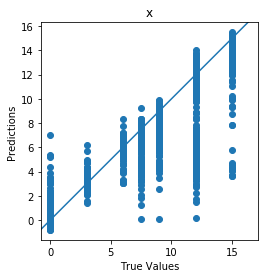

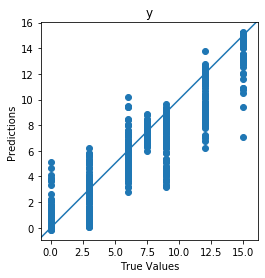

In [21]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='x')
plot_diff(test_Y[1], Y_pred[1], title='y')

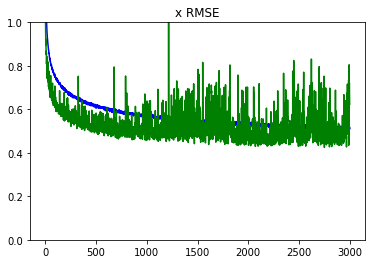

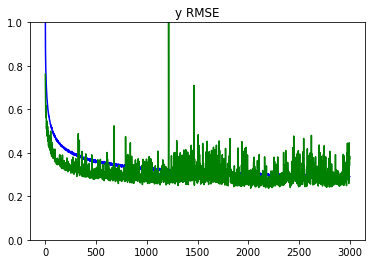

In [22]:
# Plot RMSE
plot_metrics(metric_name='x_output_root_mean_squared_error', title='x RMSE', ylim=1)
plot_metrics(metric_name='y_output_root_mean_squared_error', title='y RMSE', ylim=1)

In [23]:
# Save model
model.save('./xyForcePlateN2/', save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./xyForcePlateN2/assets


In [87]:
# Restore model
loaded_model = tf.keras.models.load_model('./xyForcePlate6/')

In [43]:
dataVal.iloc[:,:4].shape

(40000, 4)

In [44]:
# Run predict with restored model
predictions = loaded_model.predict(dataVal.iloc[:,:4])
x_pred = predictions[0]
y_pred = predictions[1]

In [57]:
norm_test_X.shape

(50000, 4)

In [53]:
norm_test_X[0]

array([ 1.02478891, -0.37257721,  0.63687956,  0.94191688])

In [46]:
print(x_pred)

[[ -42.01431 ]
 [  29.233204]
 [-194.94339 ]
 ...
 [ -59.731293]
 [  11.876278]
 [ -15.666477]]


In [47]:
print(dataVal.iloc[:,:4])

         F0   F1   F2   F3
68708   380  249  330  524
99414   329  254  364  461
149362  268  300  304  567
221717  336  330  330  525
96658   317  249  359  455
...     ...  ...  ...  ...
80692   389  228  367  519
39978   286  292  301  486
155390  343  247  330  520
188289  392  372  357  533
219339  404  277  326  510

[40000 rows x 4 columns]


################################################################################